# Capstone Project: ByDefault-Prediction of Credit Card Fraud

# Problem Statement:


A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies recognize fraudulent credit card transactions so that customers are not charged for items they did not purchase. 

# Data Source and Dataset Description:

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where 492 frauds out of 284,807 transactions were identified.

# Existence of Imbalanced Dataset:

Only 492 frauds out of 284,807 transactions recorded in two days shows highly unbalanced class values, the positive class (frauds) account for only 0.172% of all transactions. Meaning that 99.83% were clean transactions.

# Objective of the Capstone Project:

To build a Machine Learning classification model, which will provide a Classifier to predict whether a transaction is fraudulent or not.

# Project Methodology:

To Accomplish the Project Below are the Methodological Steps to Follow:
    
	Exploratory Data Analysis: Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations. 
    
	Data Cleaning: This might include standardization, handling the missing values and outliers in the data. 
    
	Dealing with Imbalanced data: This data set is highly imbalanced. The data should be balanced using the appropriate methods before moving onto model building.
    
	Feature Engineering: Create new features or transform the existing features for better performance of the ML Models. 
    
	Model Selection: Choose the most appropriate model that can be used for this project. 
    
	Model Training: Split the data into train & test sets and use the train set to estimate the best model parameters. 
    
	Model Validation: Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting.
    
	Model Deployment: Model deployment is the process of making a trained machine learning model available for use in a production environment. 


# Loading of Dataset

In [1]:
# Importing Important Libraries:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\user\Documents\Others\Home\Trainings\Data_Science_Course\Knowledge_Hut_BootCamp\Data Scientist Bootcamp_capstone_project\creditcard.csv')

In [3]:
# Understanding DataFrame Columns:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
# DataFrame Shape and Missing values

print(df.shape)
round((df.isnull().sum() / len(df))*100,2)

(284807, 31)


Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [5]:
# Picking several random samples of the DataFrame

df.sample(10)

Time        V1        V2        V3        V4        V5        V6  \
35281    38046.0 -1.823052 -0.888156  1.880753 -0.293730  0.087247 -0.893491   
247831  153704.0  2.118345 -1.296793  0.317497 -0.525943 -1.749749 -0.076141   
186129  126968.0  2.006508 -0.398689 -2.952190 -1.055997  2.542666  2.992624   
271151  164436.0 -0.970661  2.081451  1.401083  4.263760 -0.245075  1.788288   
113456   73072.0 -1.757511  0.889084  1.869356  1.214493 -1.156920  0.449736   
238546  149716.0  1.927293 -0.534045 -0.292602  0.692841 -0.890405 -0.618640   
134384   80778.0  0.103981  0.744378  1.615816  1.413667 -0.295769  0.296790   
241700  151140.0  1.814990  0.027022 -1.406098  0.809629 -0.265934 -1.975131   
168412  119215.0  2.022998 -0.375497 -0.710441  0.081402  0.040969  0.657364   
254531  156775.0  1.828992  0.307693 -0.483837  3.878668  0.144357  0.118508   

              V7        V8        V9  ...       V21       V22       V23  \
35281   0.227521 -0.460620 -0.899774  ... -0.262812  0.037119 -0.196135   
247831 -1.639190  0.150531  1.068688  ...  0.123053  0.671502  0.225313   
186129 -0.184526  0.657981  0.327435  ... -0.129740 -0.492424  0.249071   
271151 -1.534516 -1.807641 -2.448742  ... -0.906741  1.343984  0.019731   
113456 -0.782836  1.252772 -0.784965  ...  0.347988  0.635661 -0.038263   
238546 -0.595925 -0.044258  1.304905  ...  0.212651  0.750675  0.107914   
134384 -0.067639  0.253649 -0.517825  ...  0.238537  0.811193  0.251154   
241700  0.498153 -0.545314  0.339000  ...  0.324477  0.953896 -0.006664   
168412 -0.709770  0.161596  1.072087  ...  0.246953  0.993664 -0.010088   
254531 -0.004068  0.076356 -0.763969  ...  0.133044  0.451216  0.077802   

             V24       V25       V26       V27       V28  Amount  Class  
35281   0.387397 -0.127551 -0.562201 -0.444470  0.368146  119.50      0  
247831 -0.081990 -0.330233 -0.181225  0.061121 -0.039519    2.00      0  
186129  0.695656 -0.053016 -0.139359 -0.042661 -0.060246   40.00      0  
271151 -0.408073 -0.533796  0.446724  0.043628  0.130934    1.00      0  
113456  0.211605  0.014603 -0.185911 -0.193827 -0.152353   45.00      0  
238546  0.085233 -0.217845  0.428727 -0.018664 -0.042347   38.49      0  
134384  0.211320 -1.613592 -0.500878  0.350584  0.263622    4.99      0  
241700  0.904690  0.140141 -0.172732 -0.011054 -0.003260   96.80      0  
168412 -0.080303  0.105591 -0.156959  0.041882 -0.048157    1.00      0  
254531  0.049623  0.053419  0.073267 -0.039129 -0.058964   22.75      0  

[10 rows x 31 columns]

In [6]:
# Visualizing the first 5 values of the DataFrame:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [7]:
# Visualizing the Last 5 values of the DataFrame:
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

# Conducting Exploratory Data Analysis [EDA]

In [8]:
# Importing the library:
import sweetviz as sv

In [9]:
report = sv.analyze(df, target_feat="Class")

                                             |          | [  0%]   00:00 -> (? left)


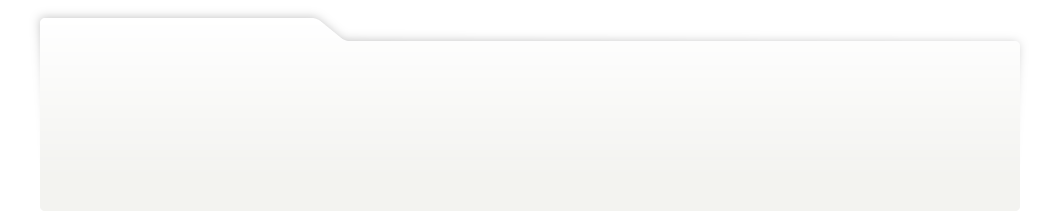
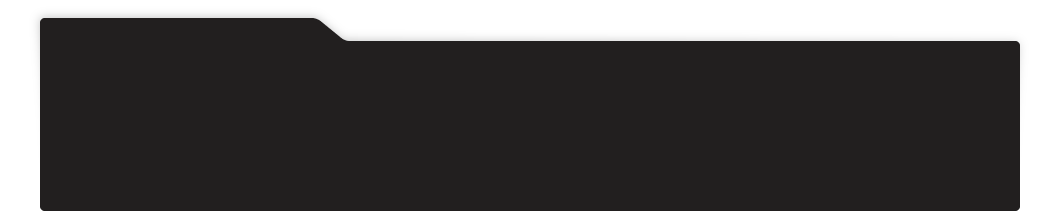
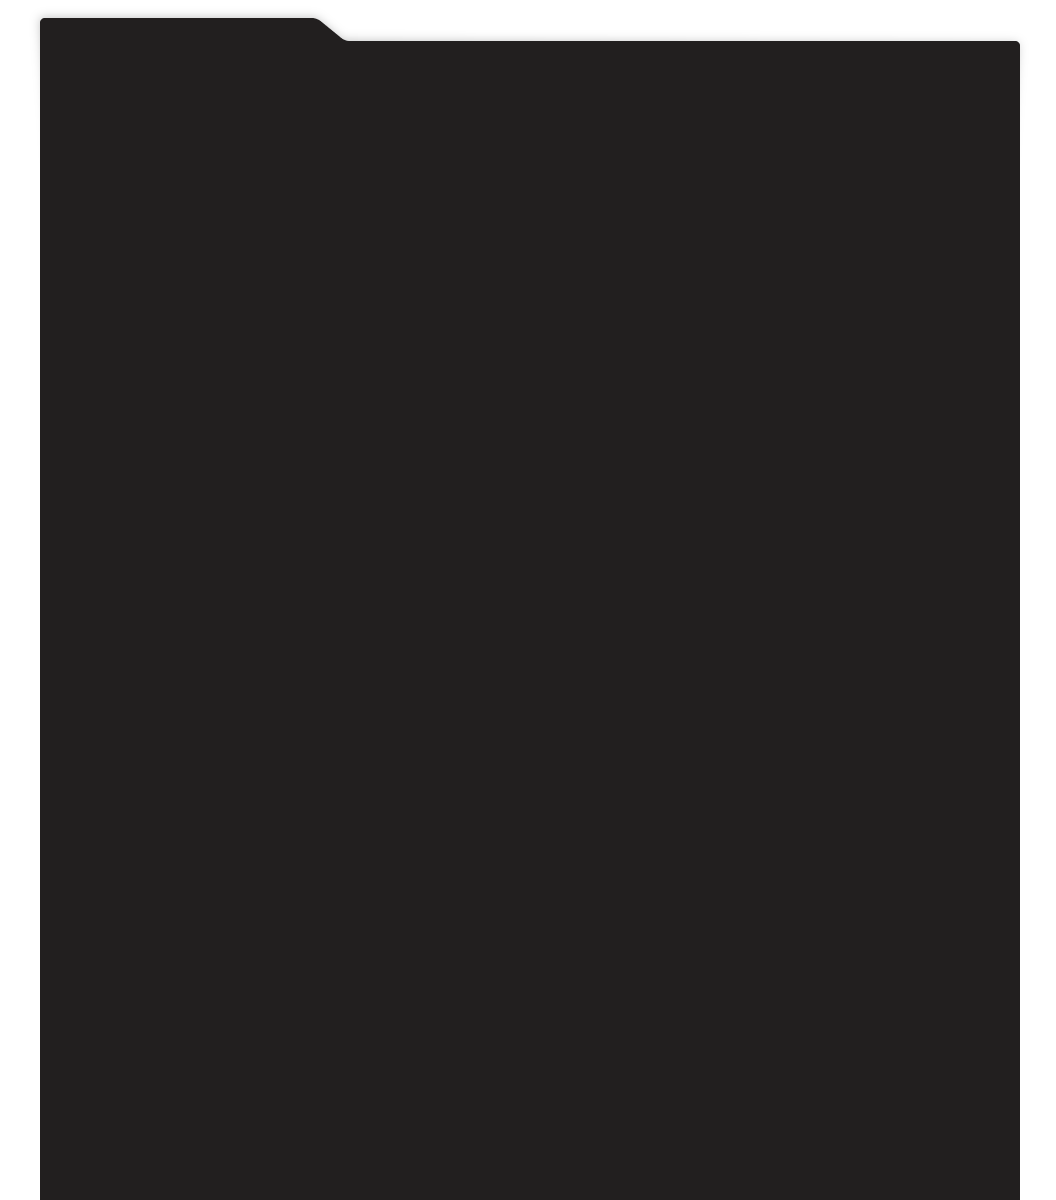
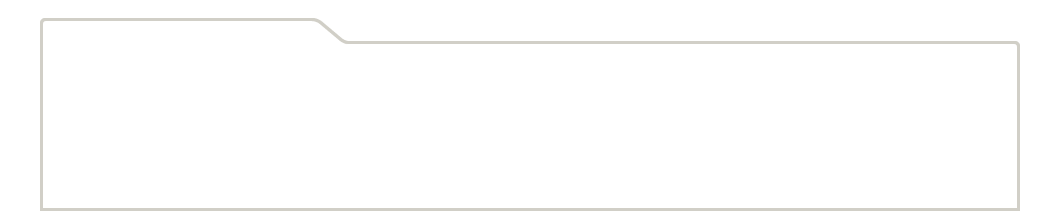
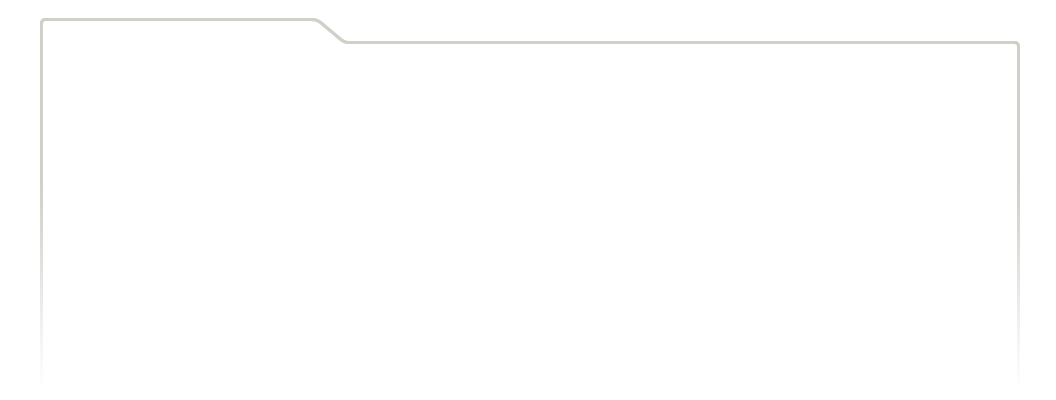
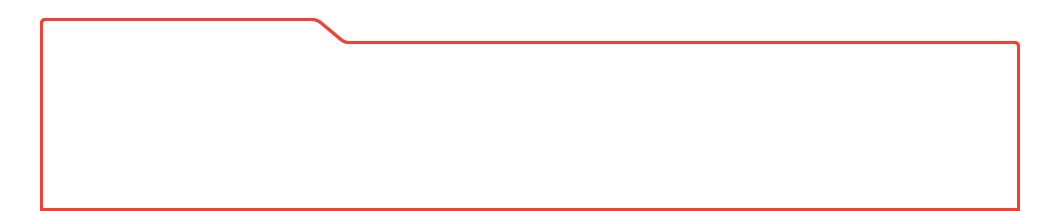
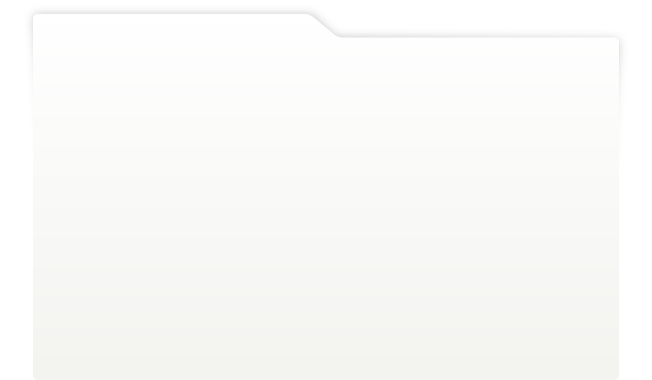
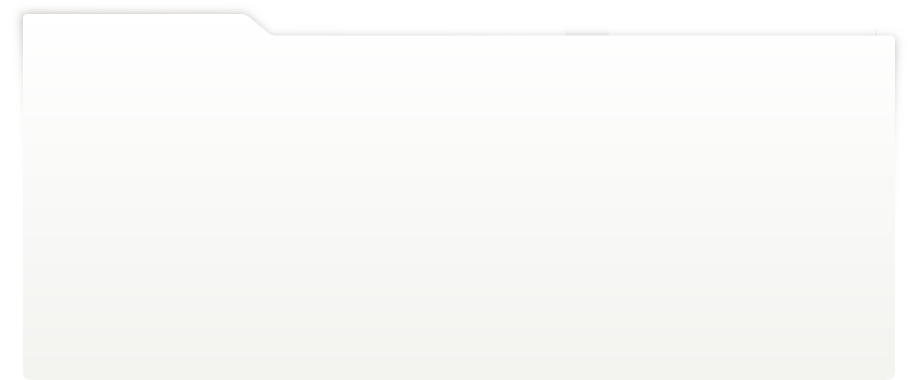
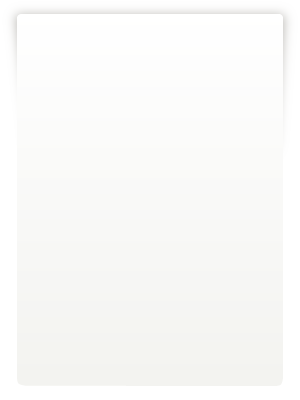
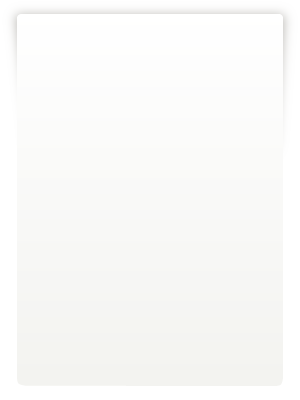
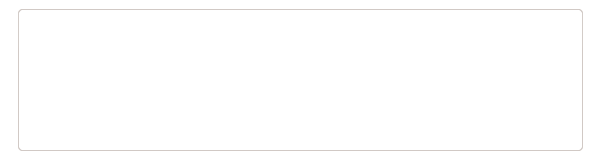
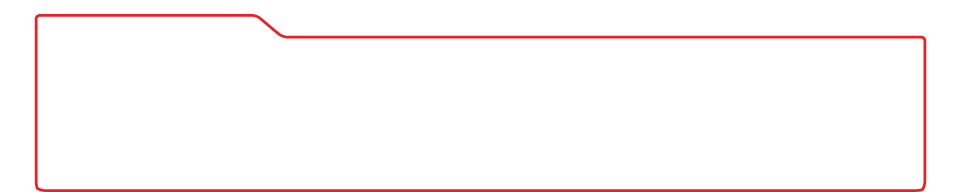
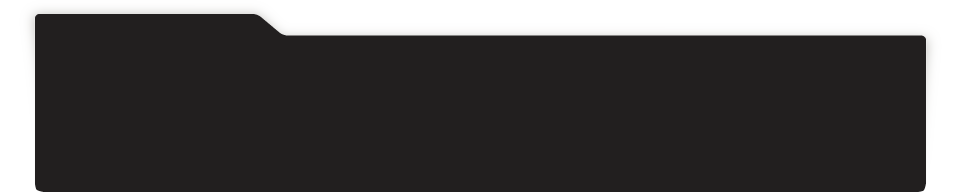
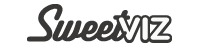
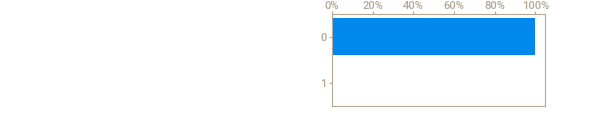
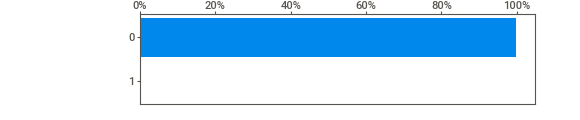
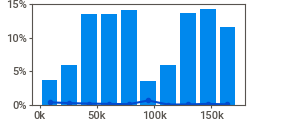
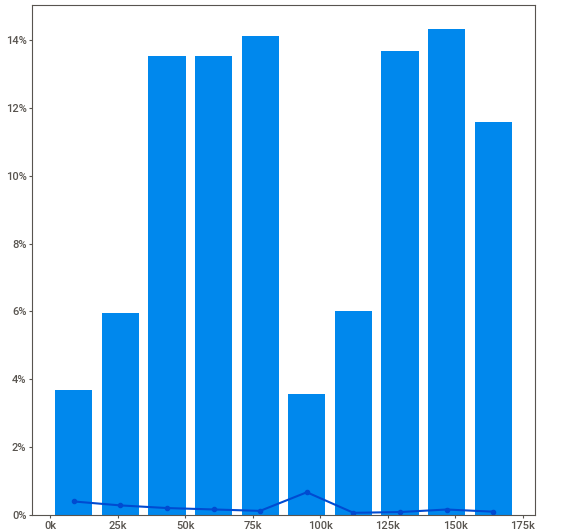
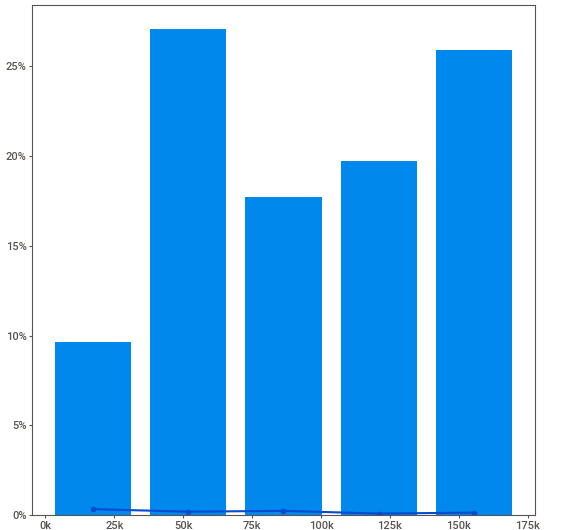
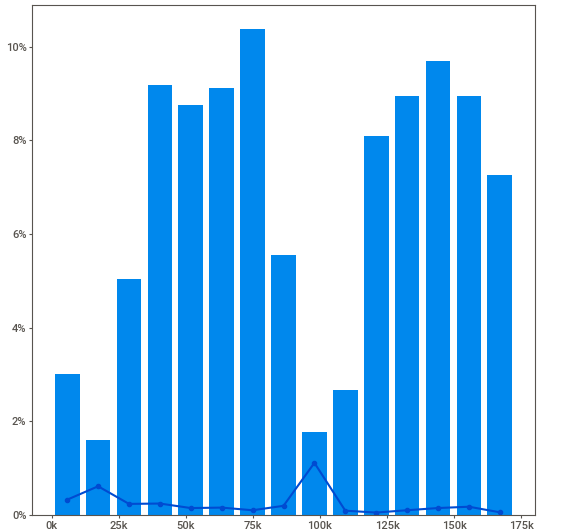
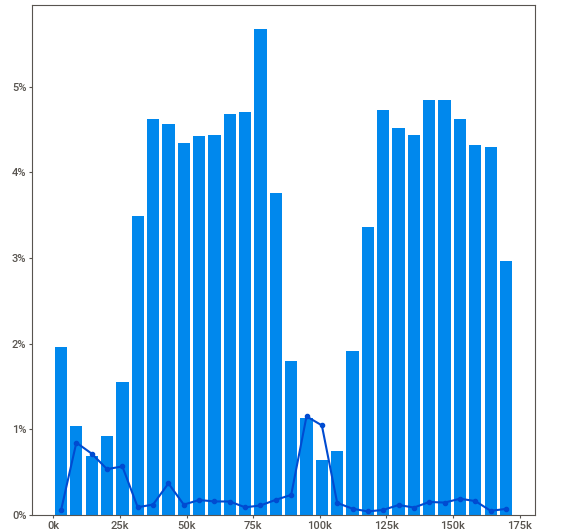
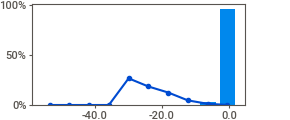
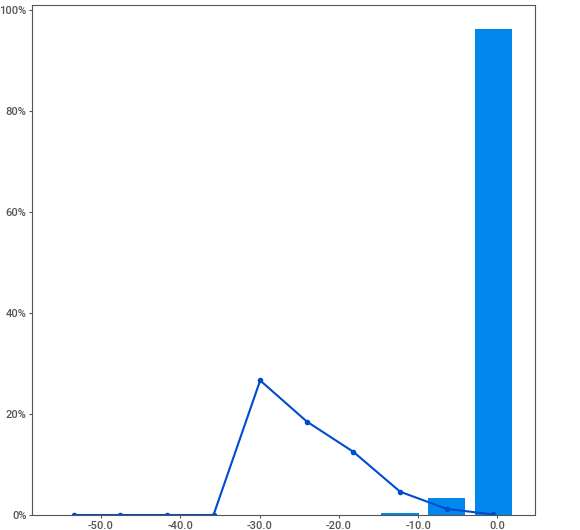
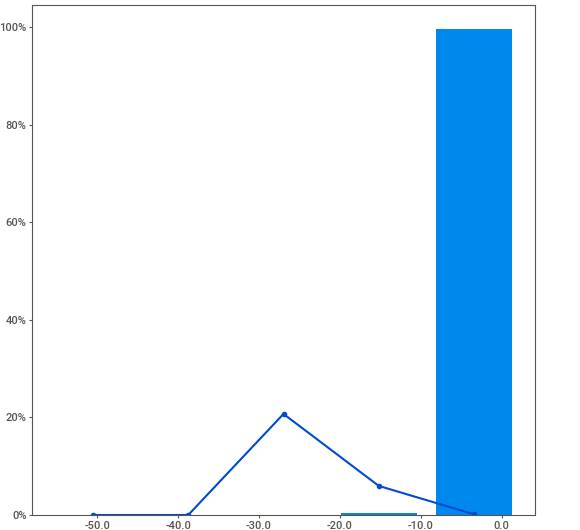
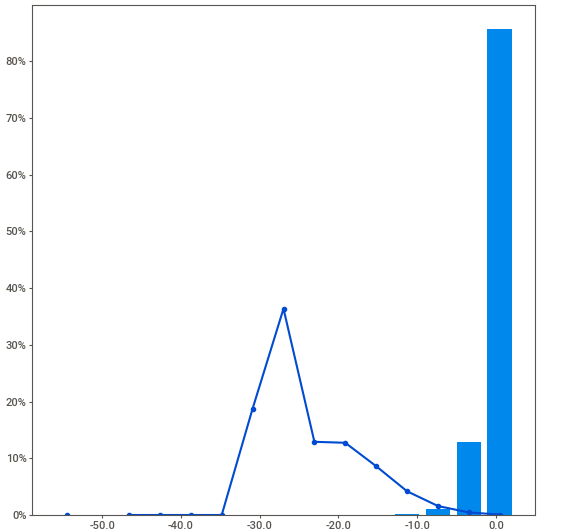
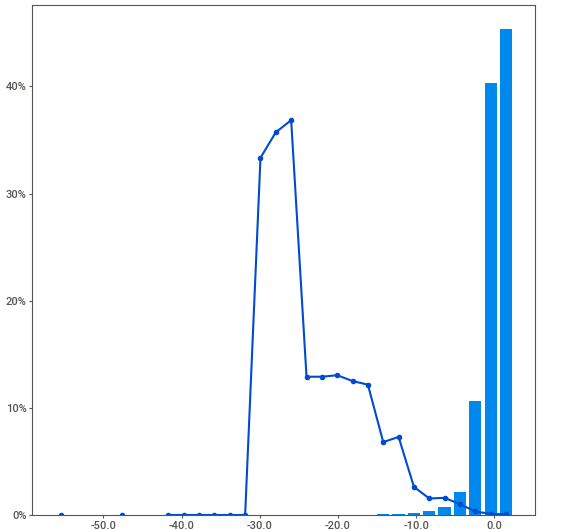
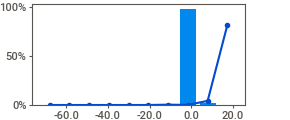
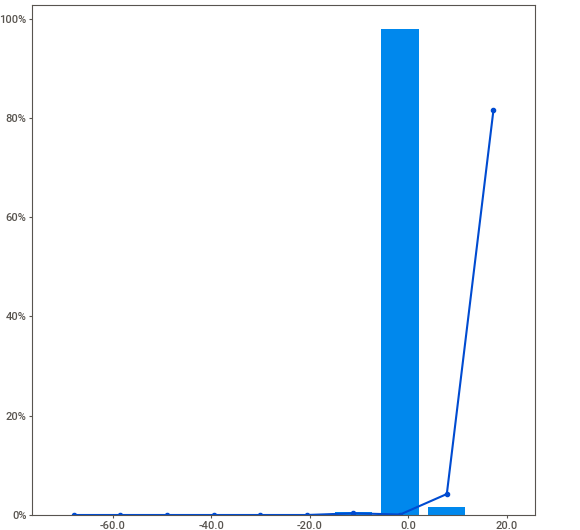
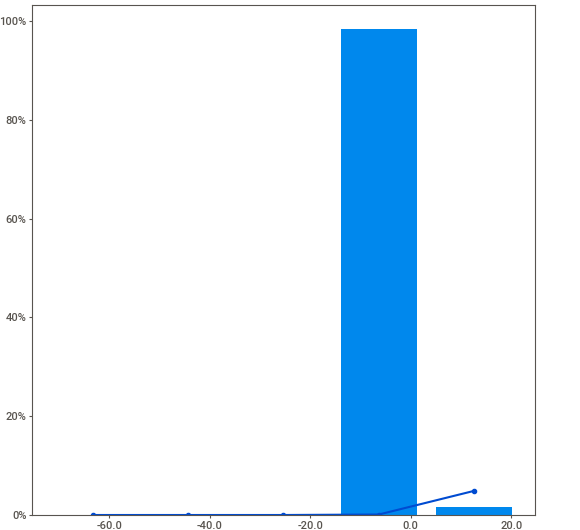
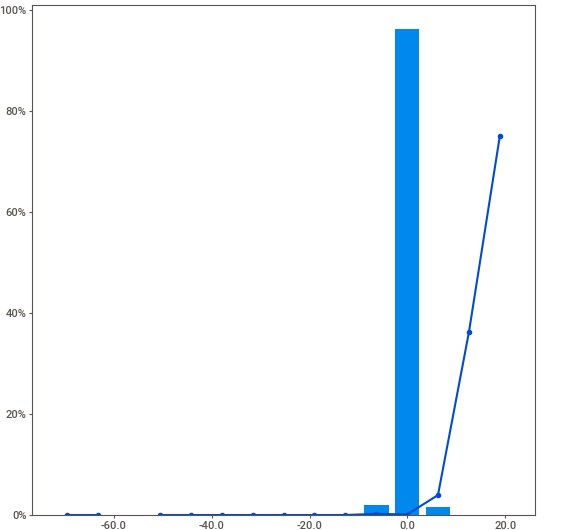
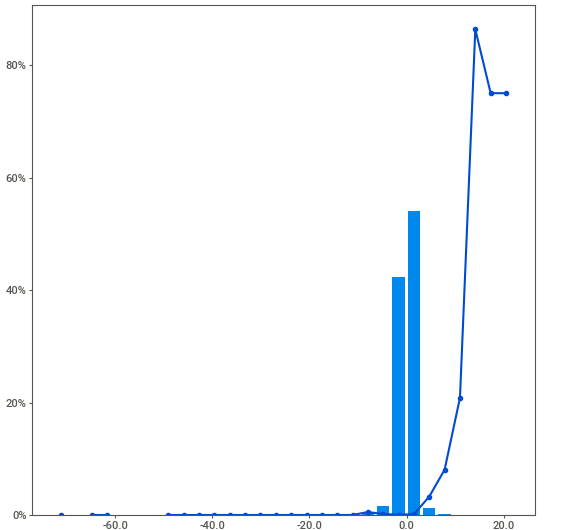
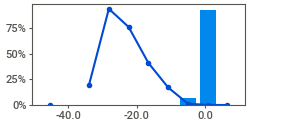
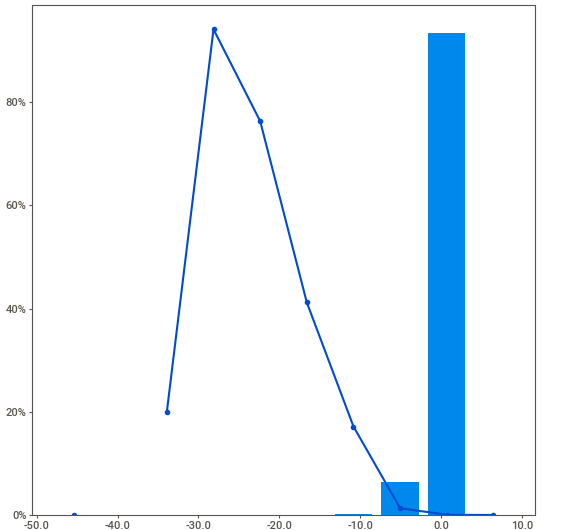
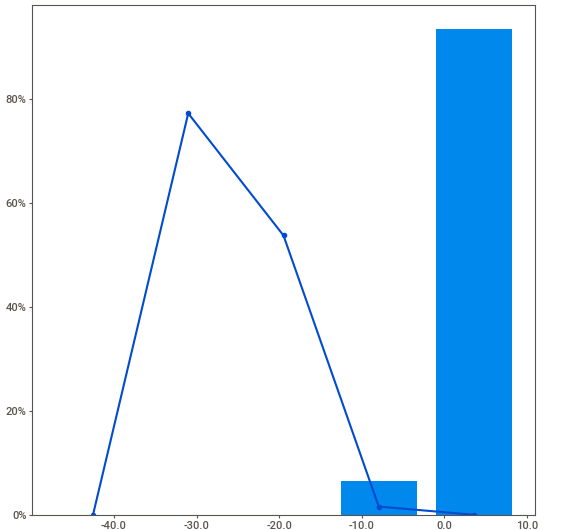
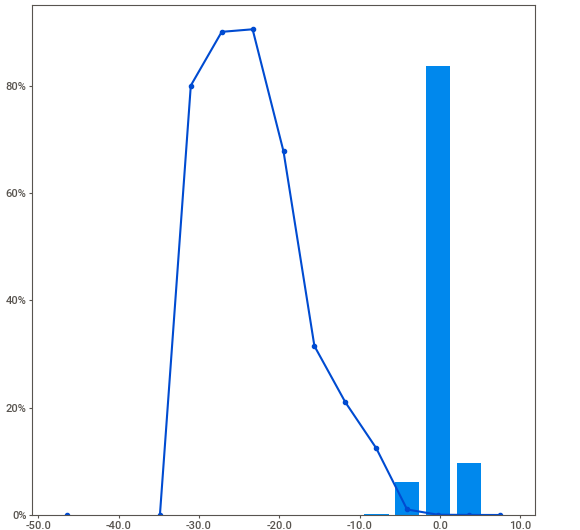
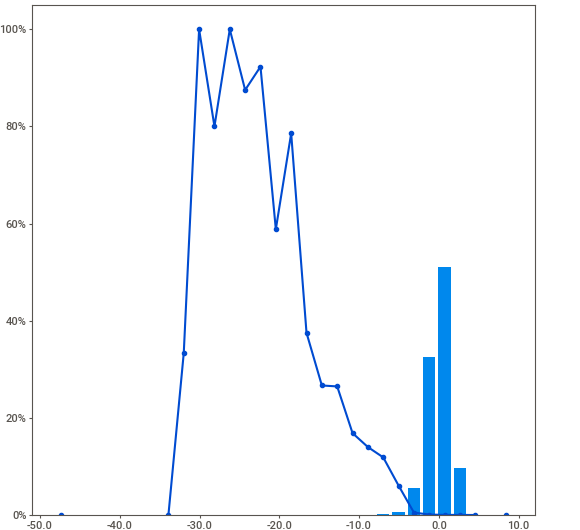
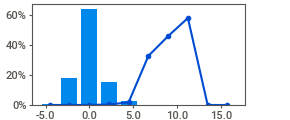
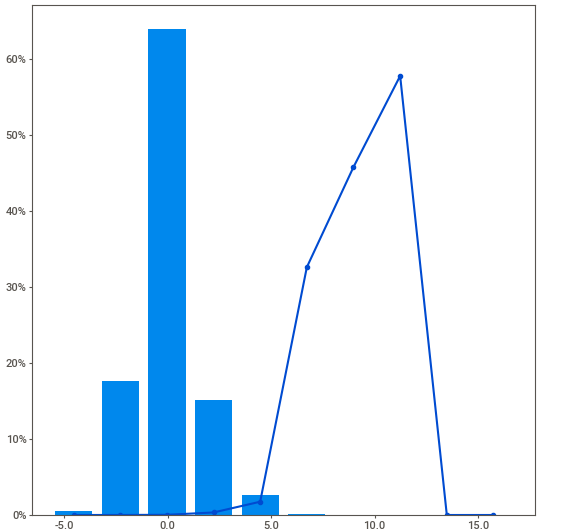
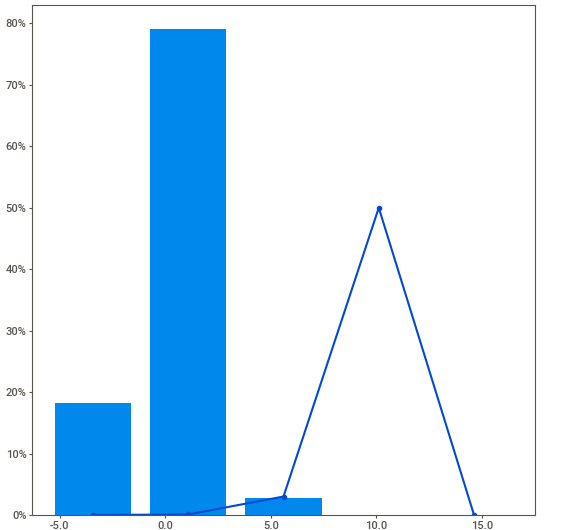
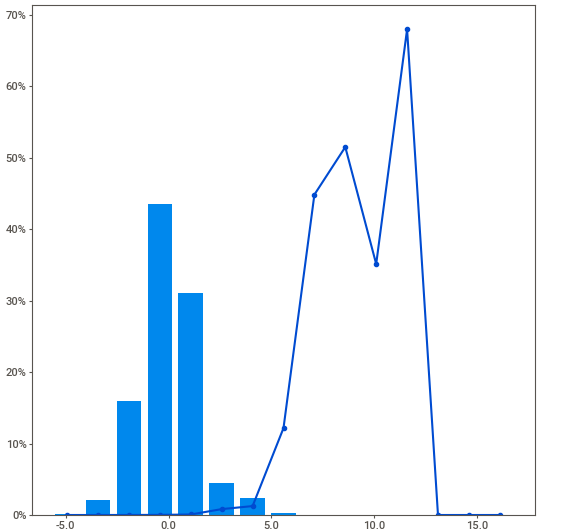
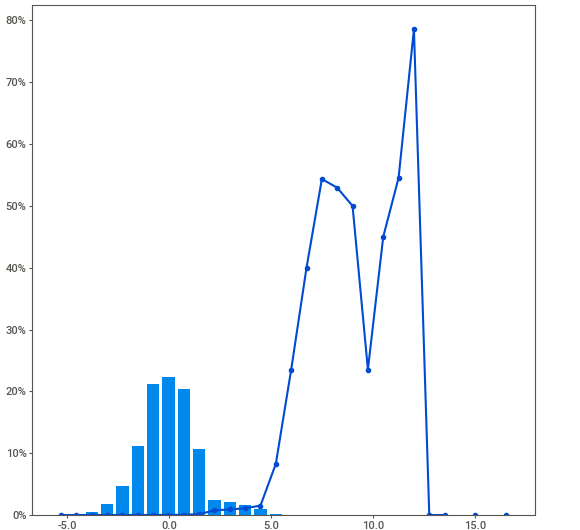
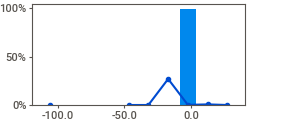
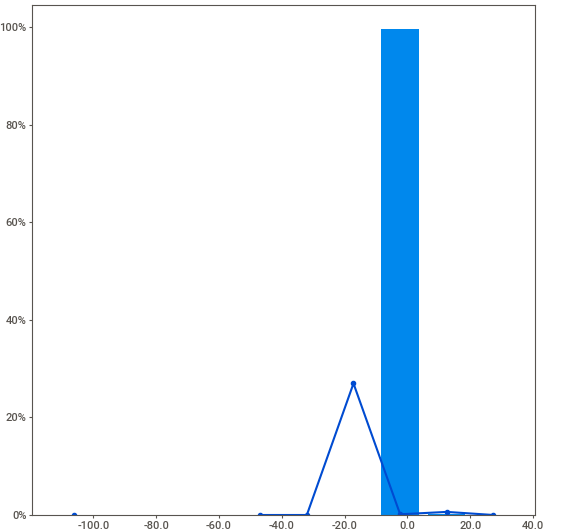
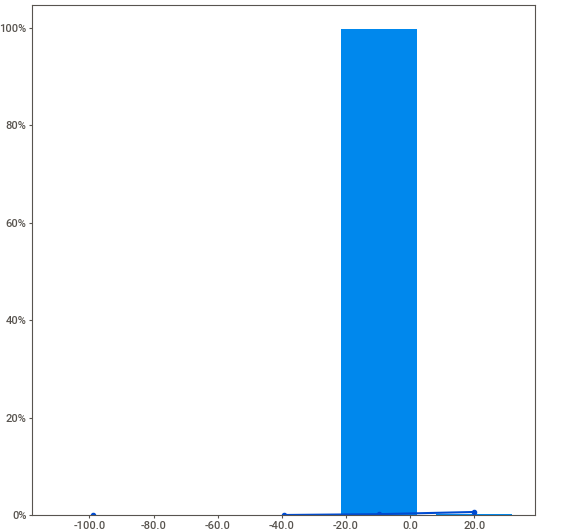
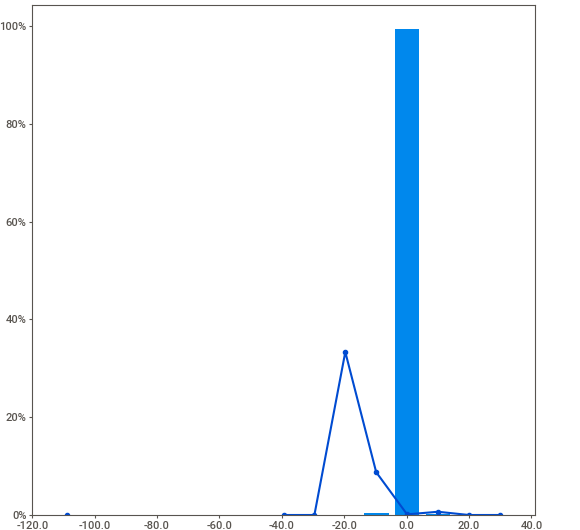
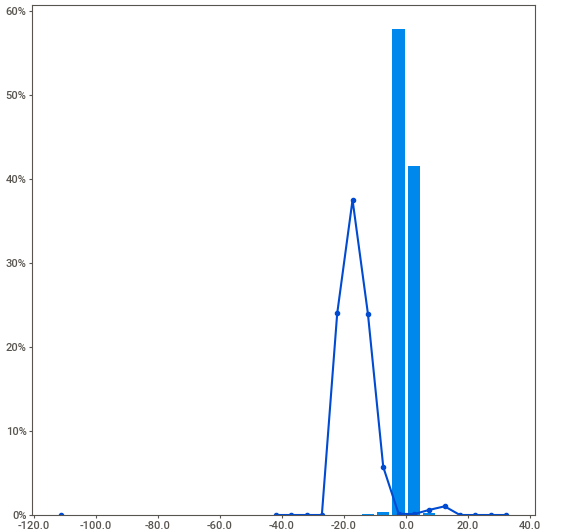
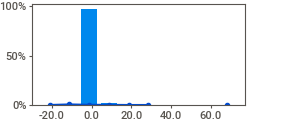
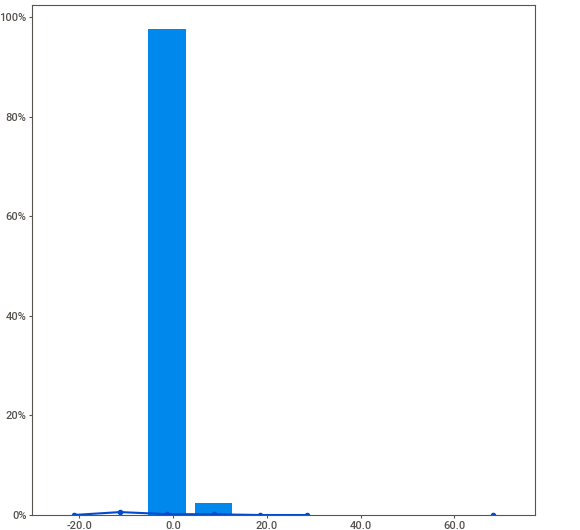
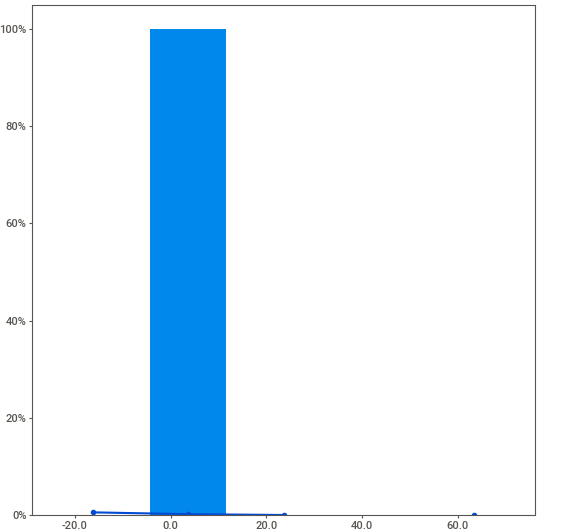
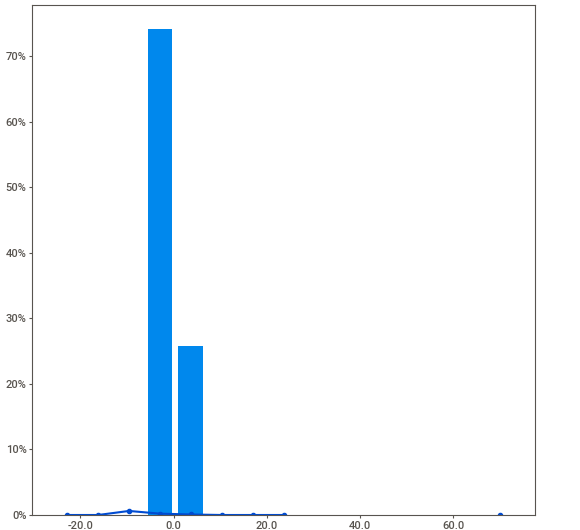
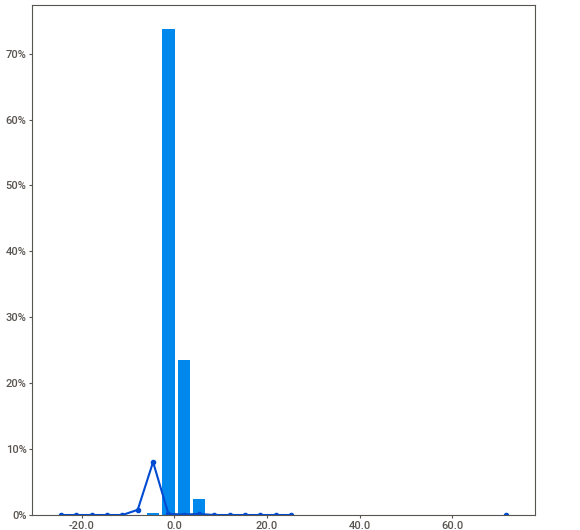
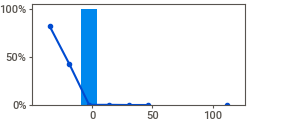
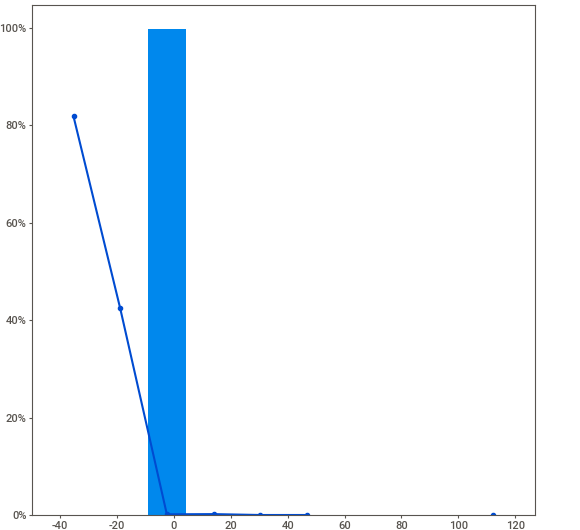
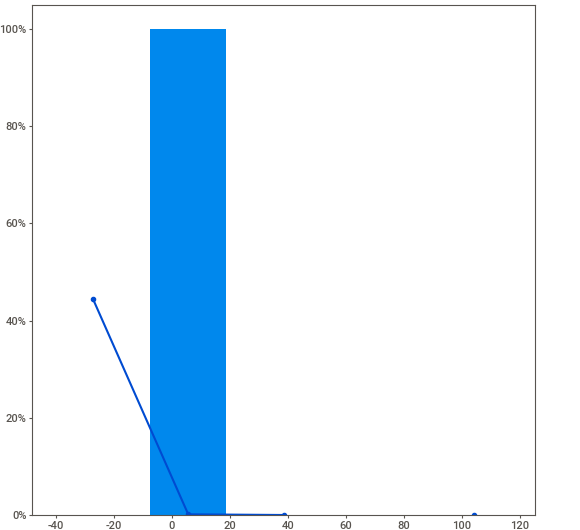
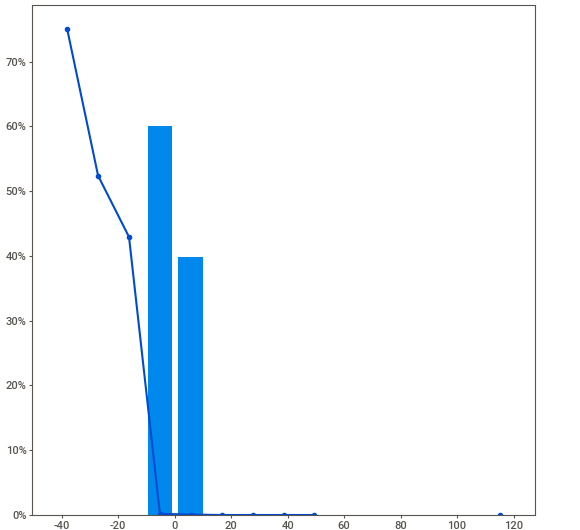
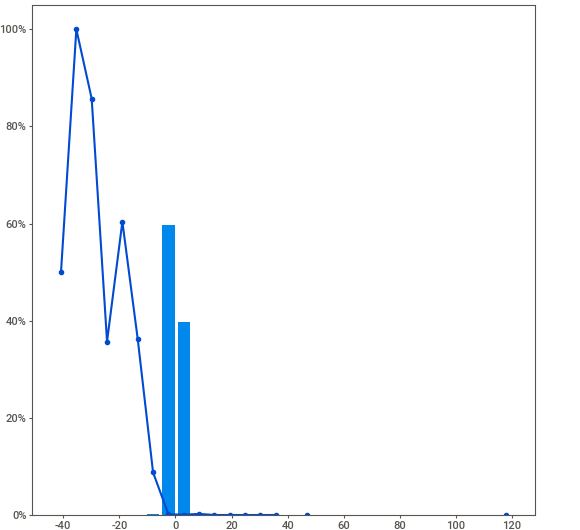
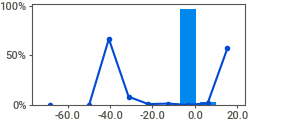
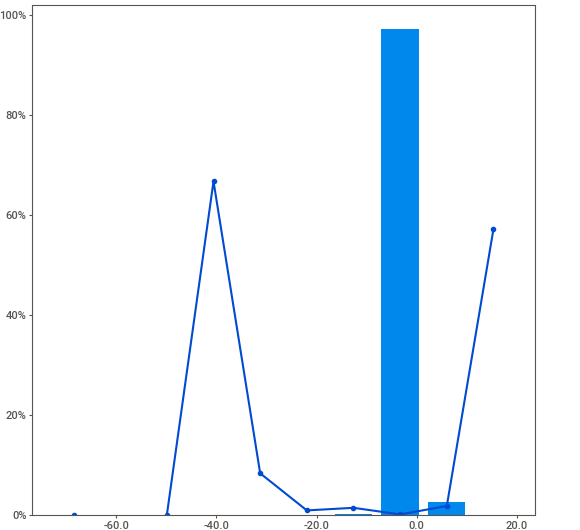
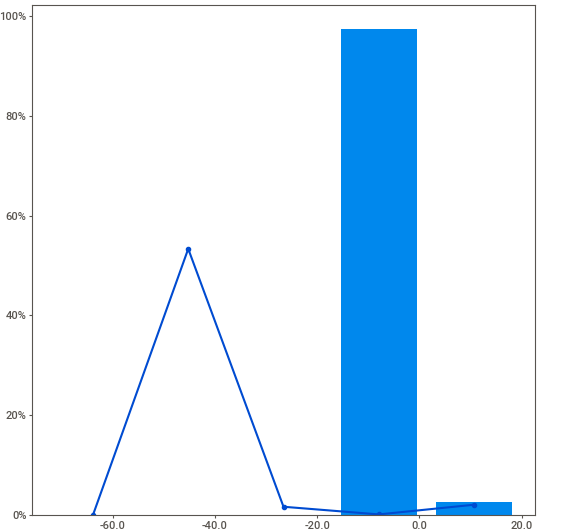
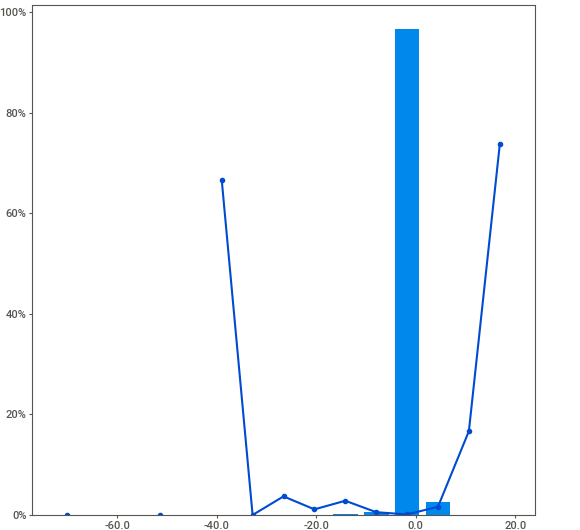
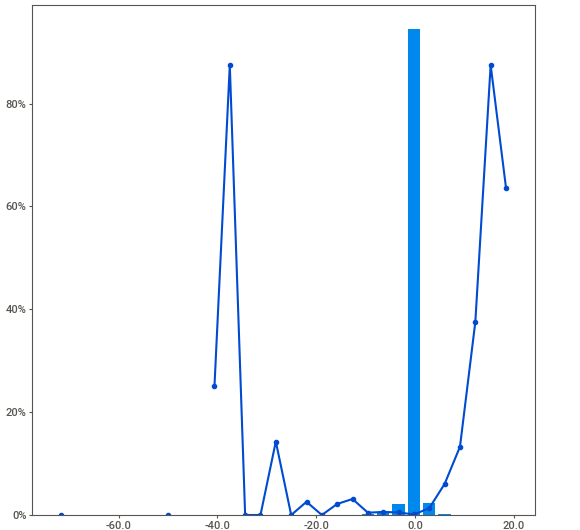
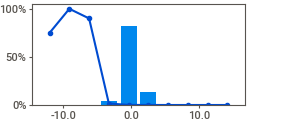
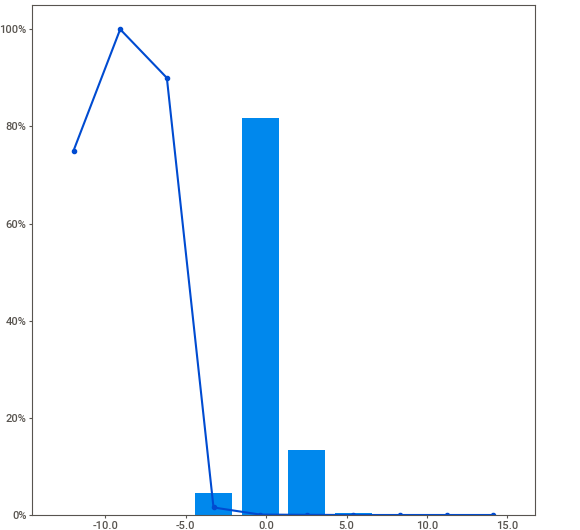
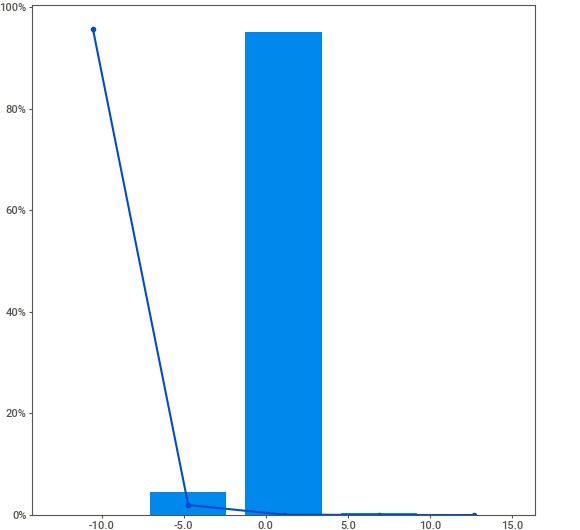
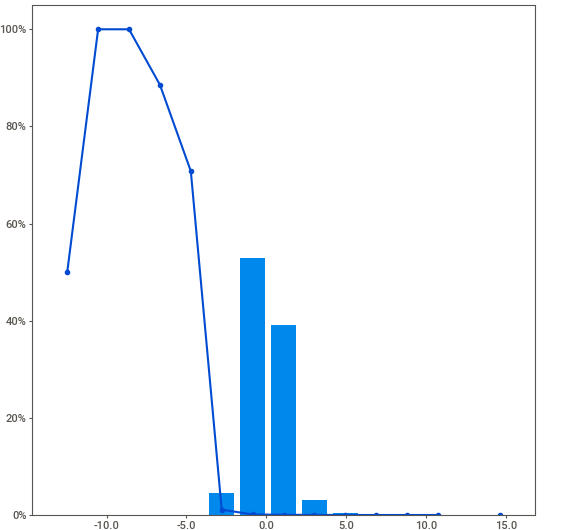
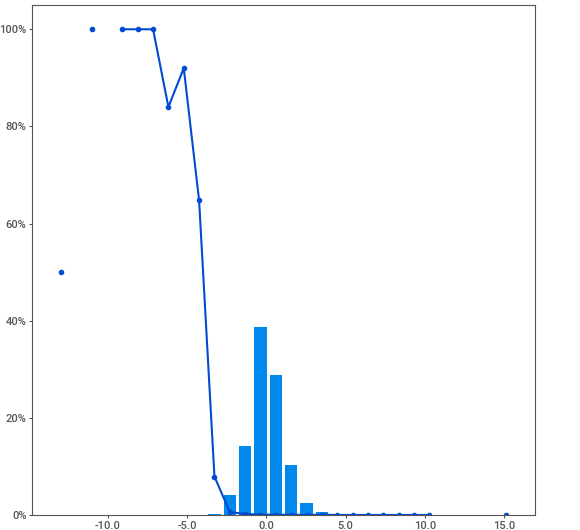
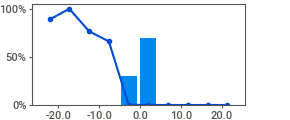
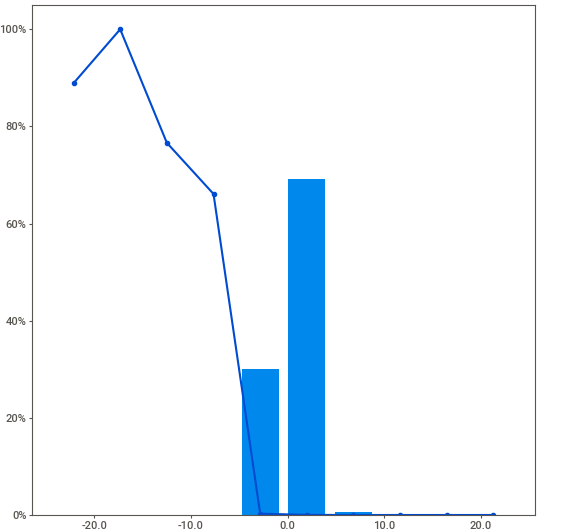
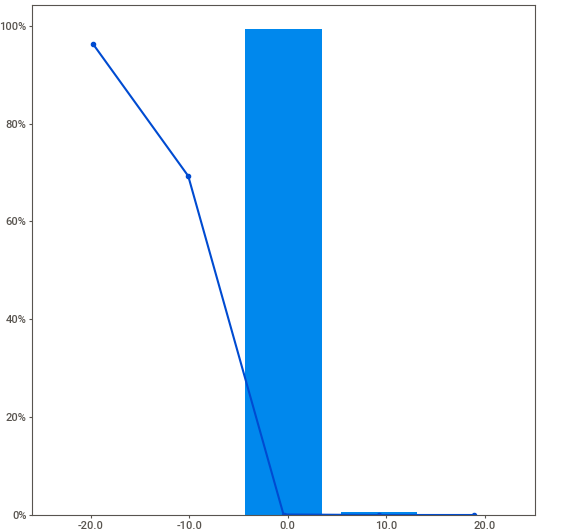
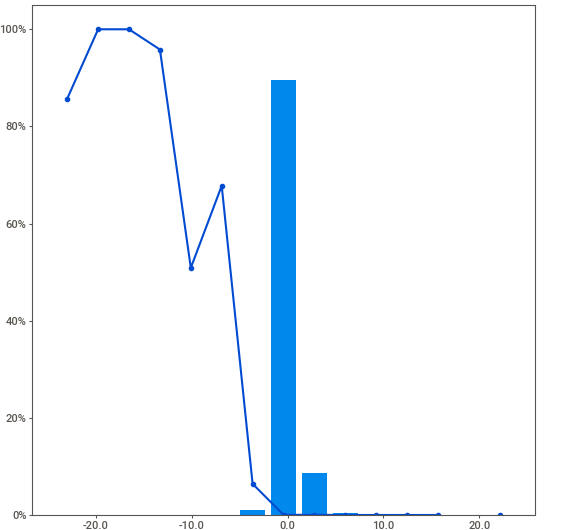
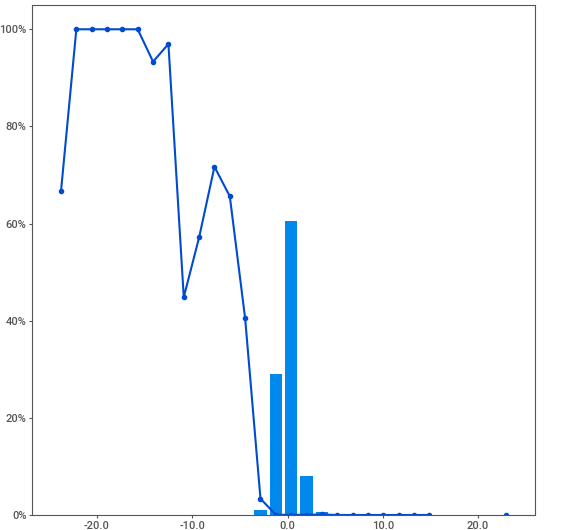
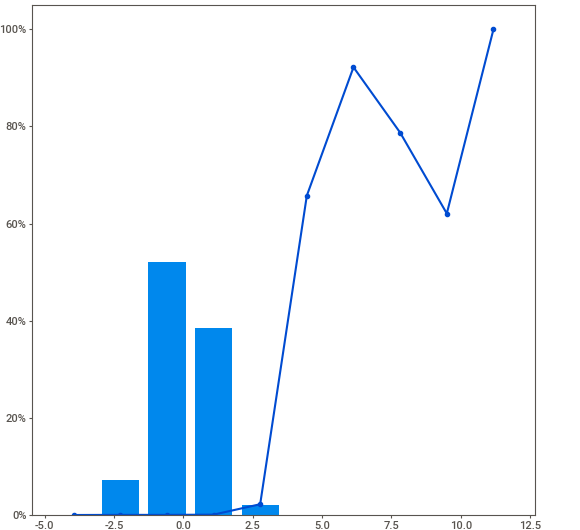
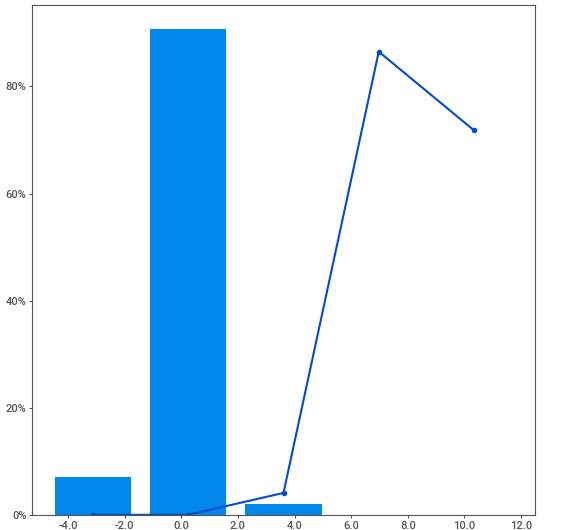
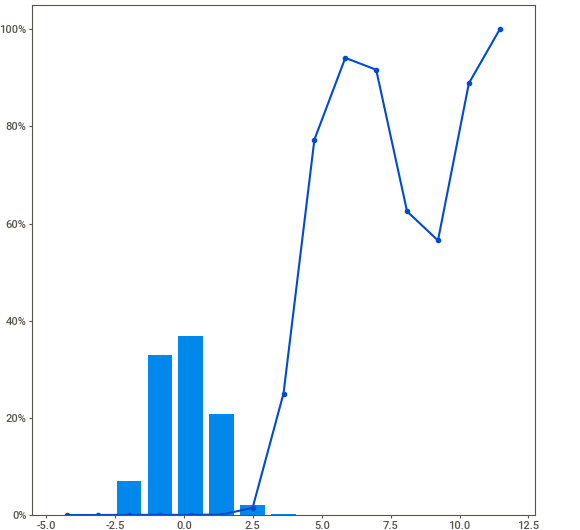
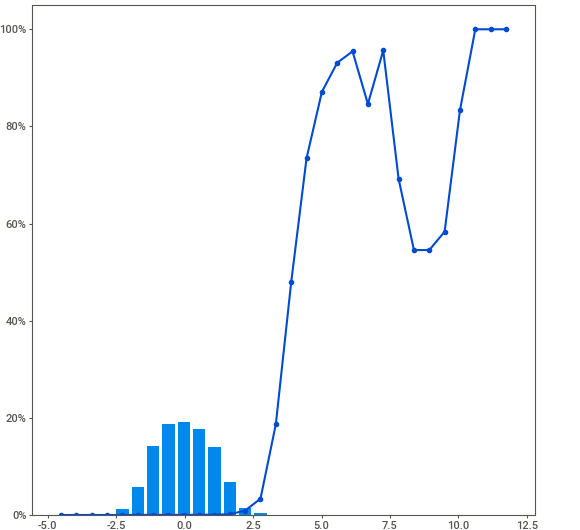
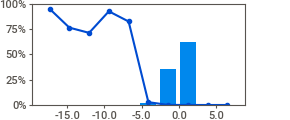
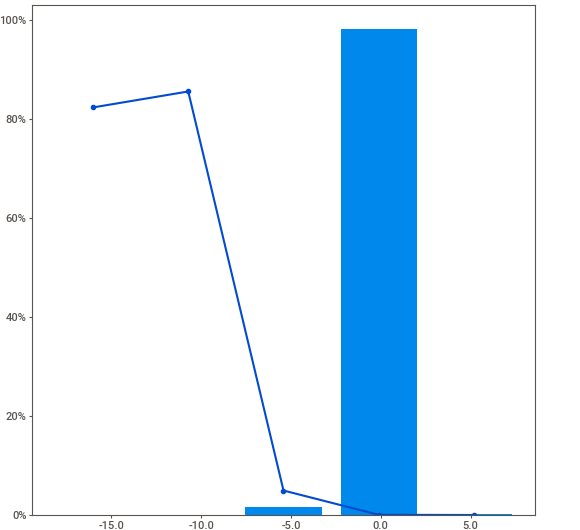
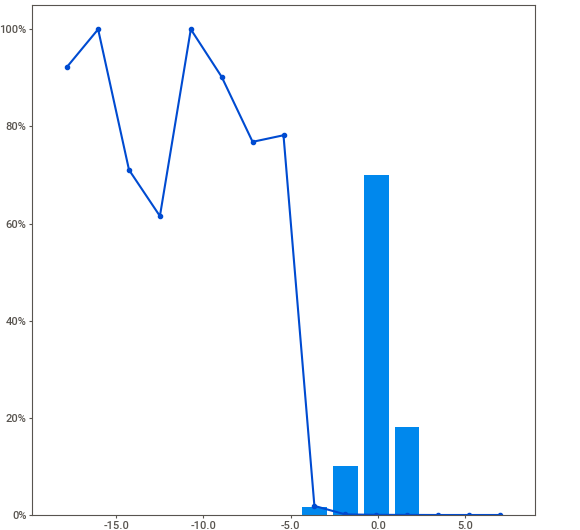
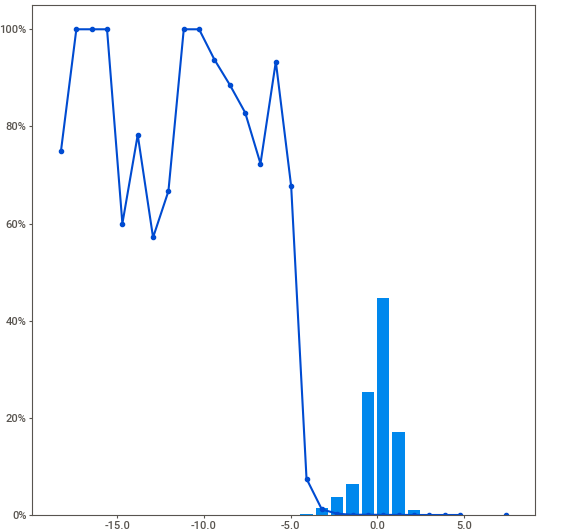
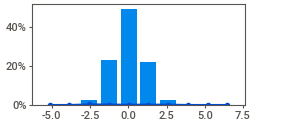
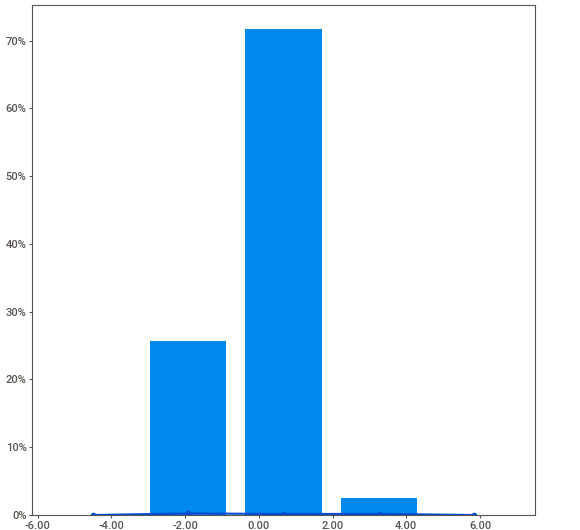
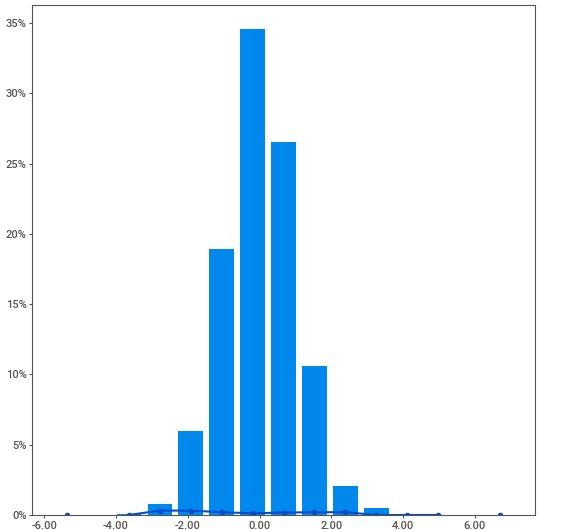
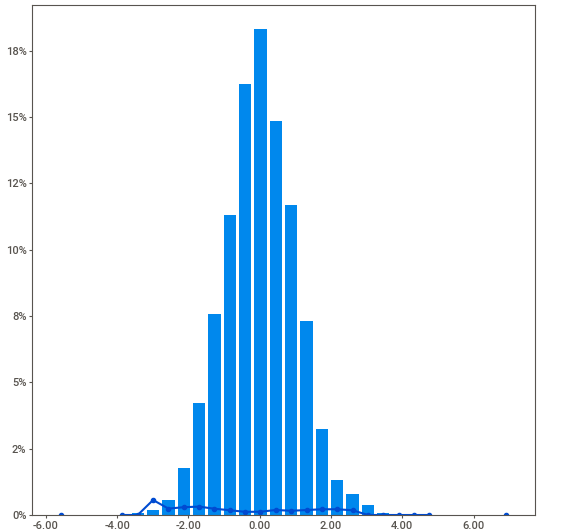
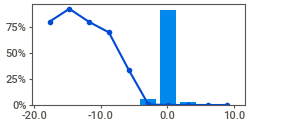
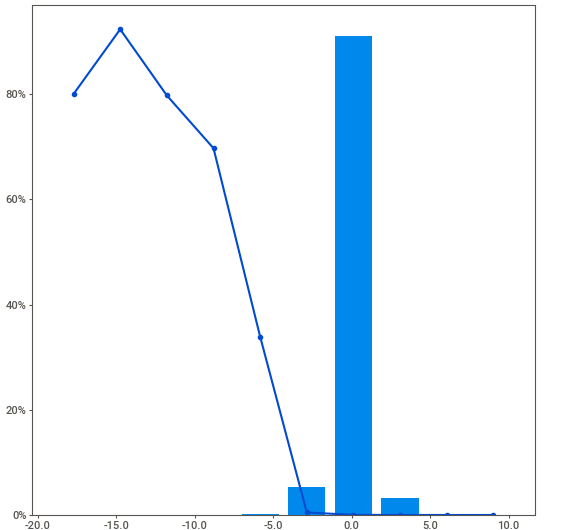
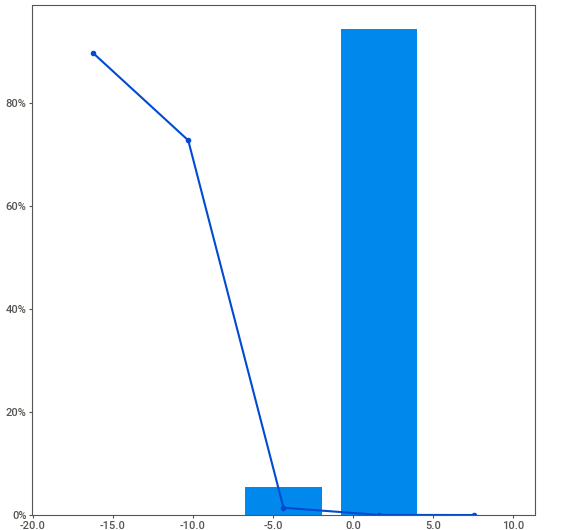
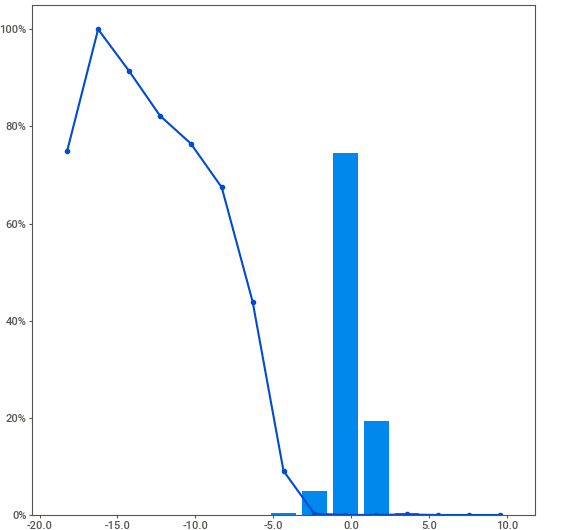
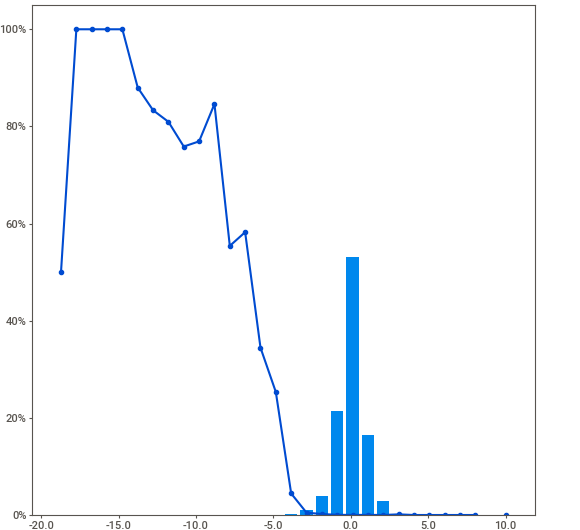
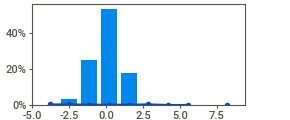
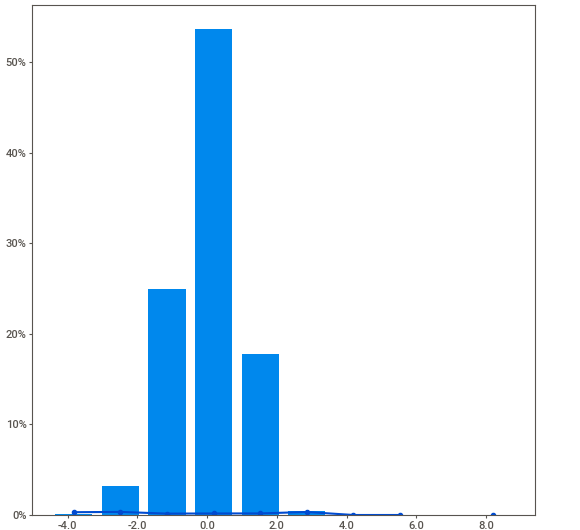
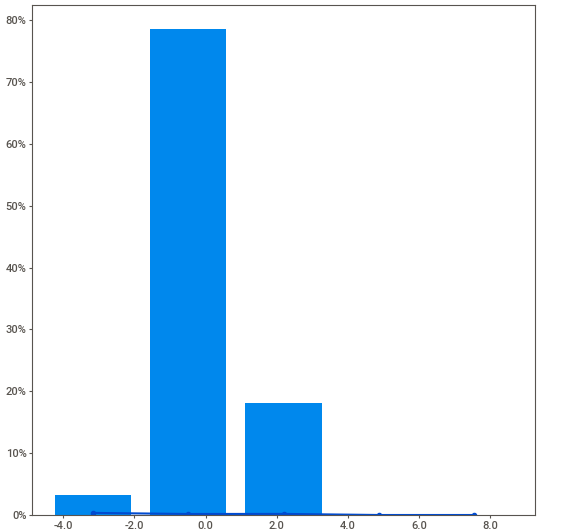
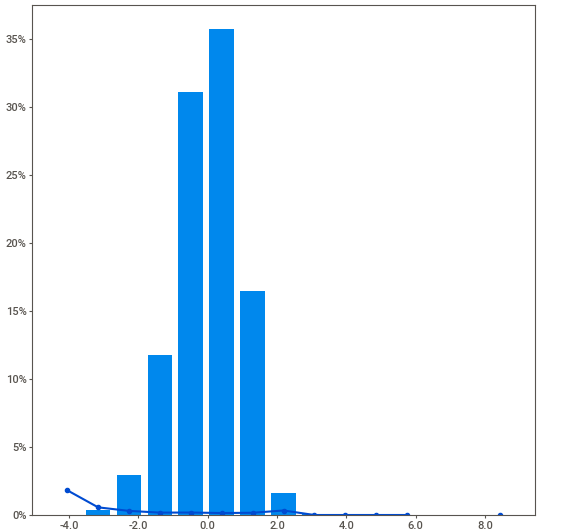
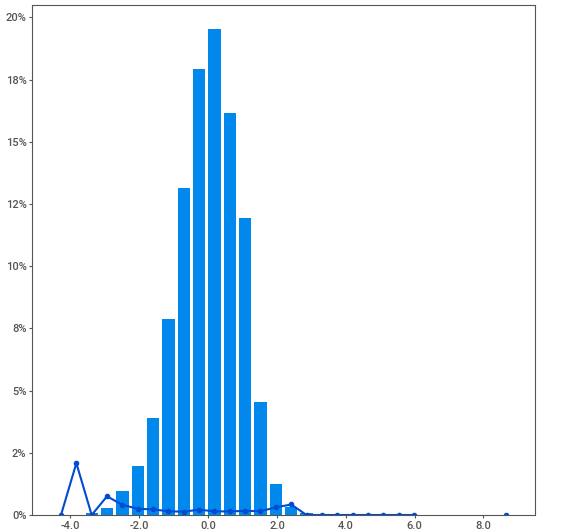
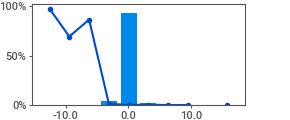
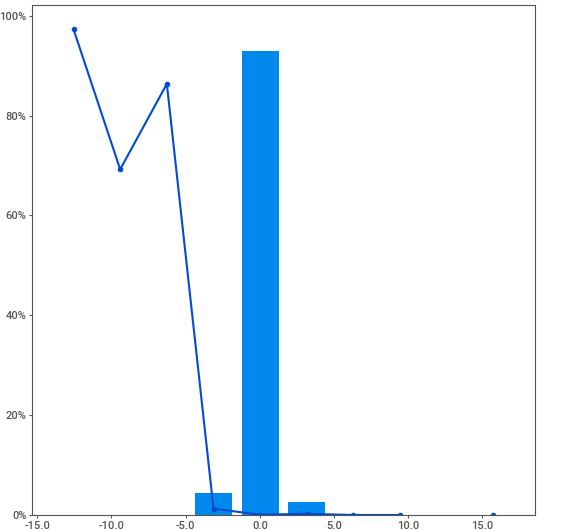
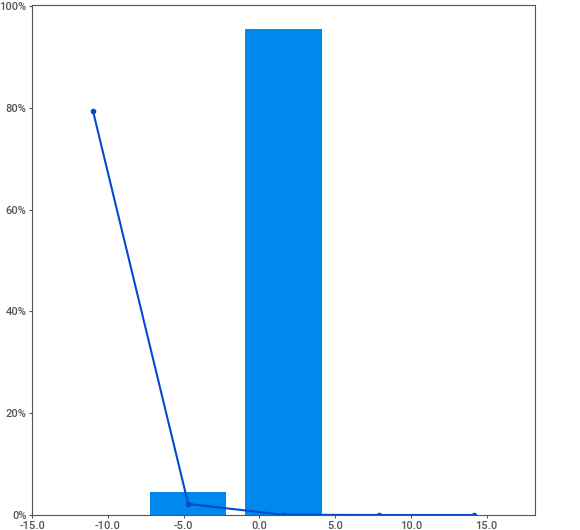
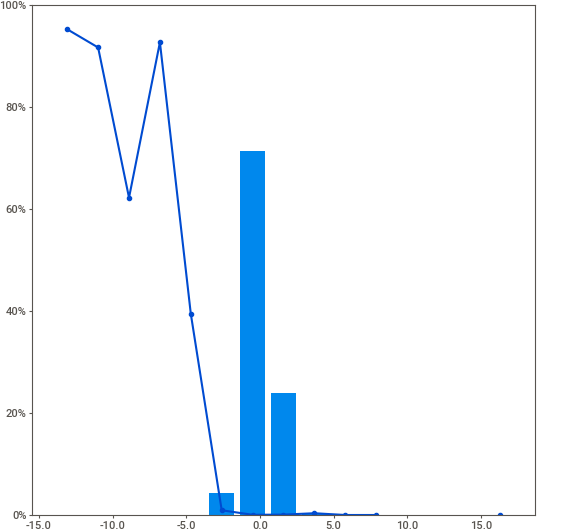
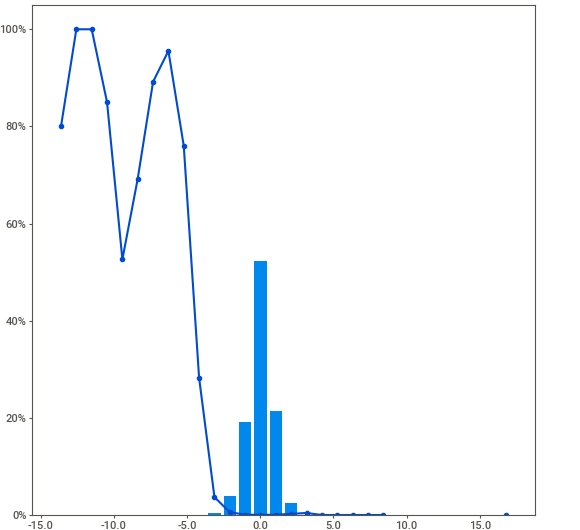
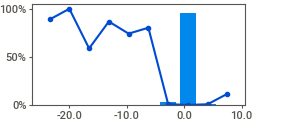
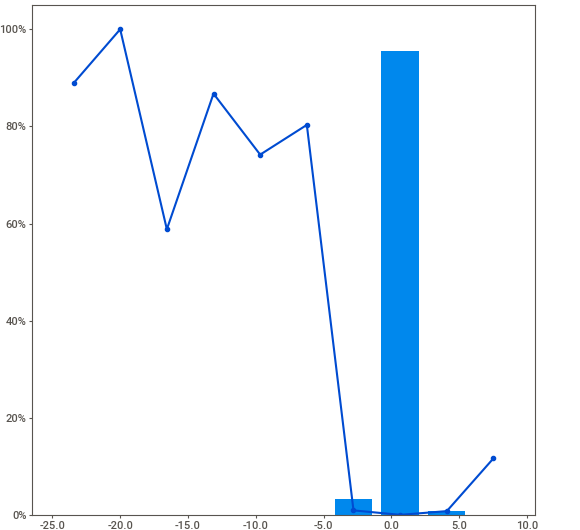
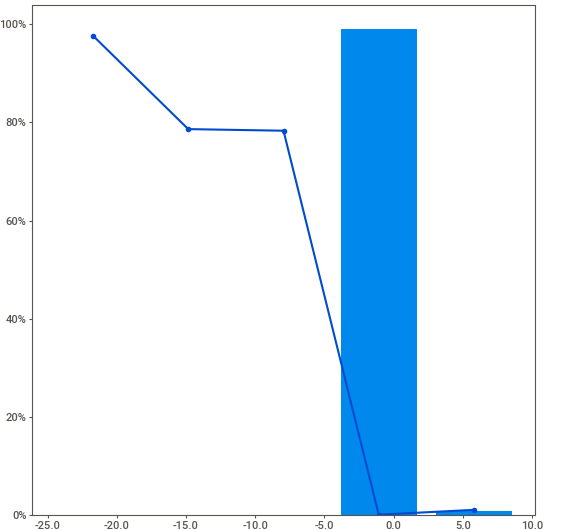
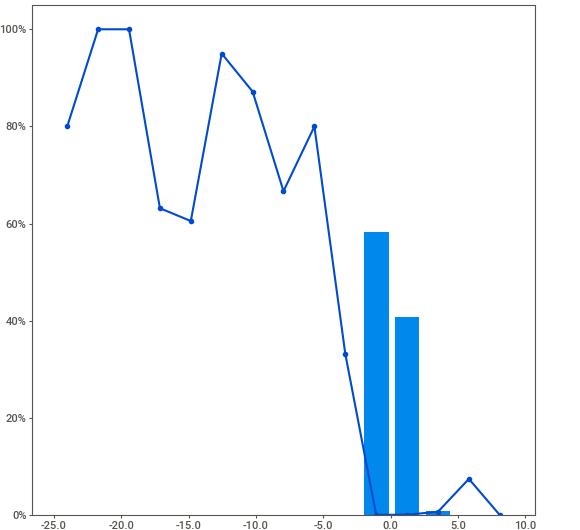
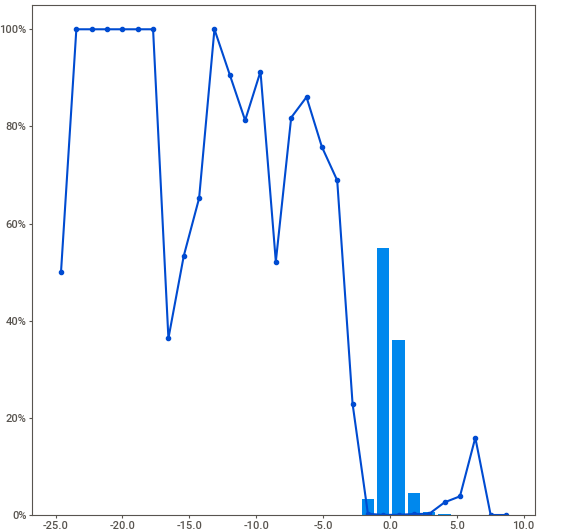
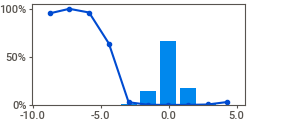
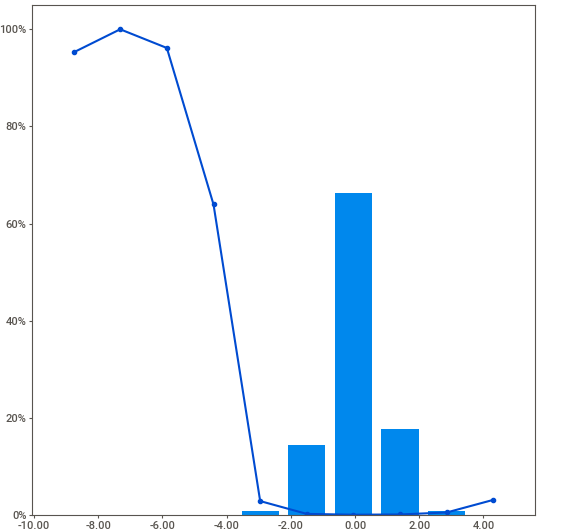
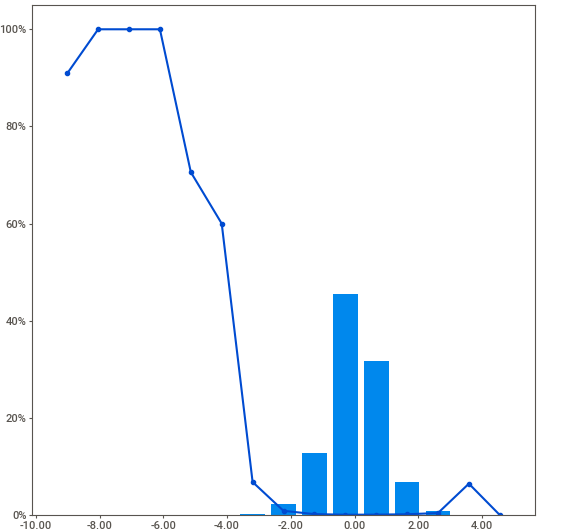
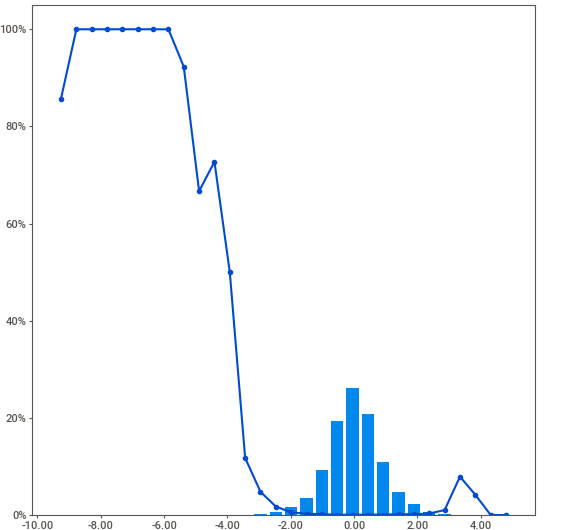
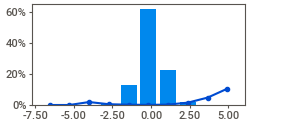
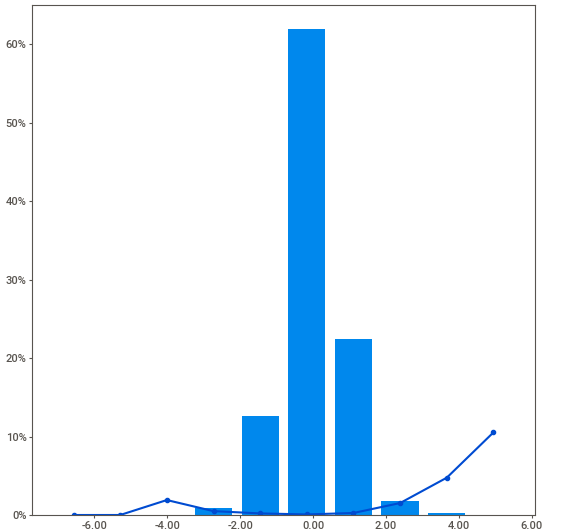
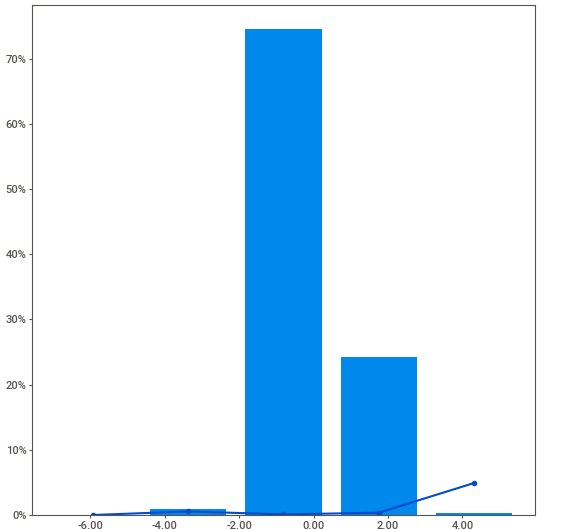
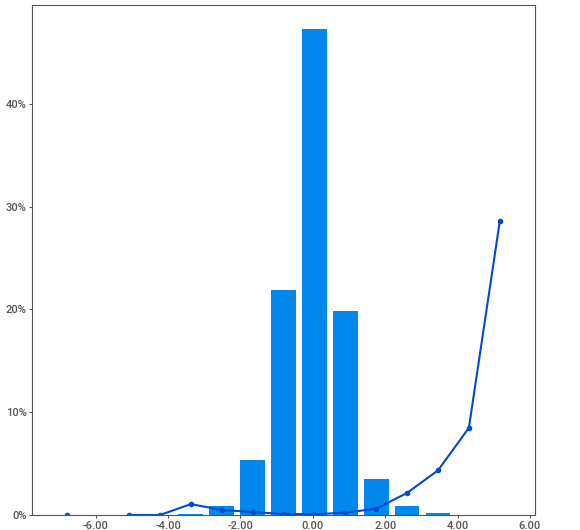
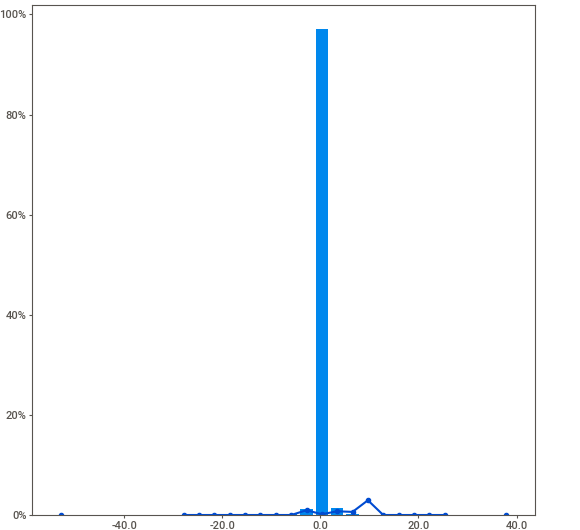
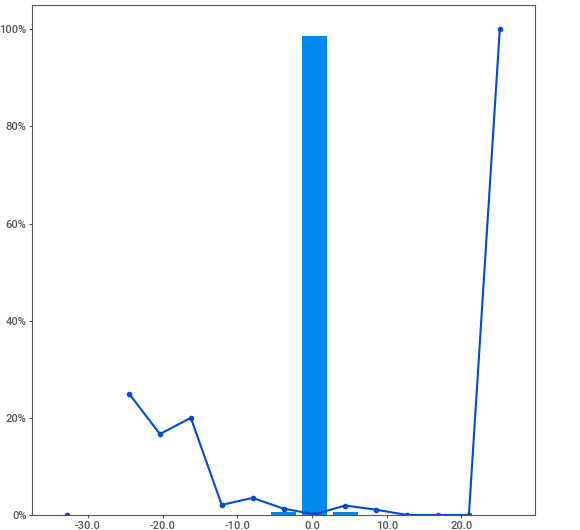
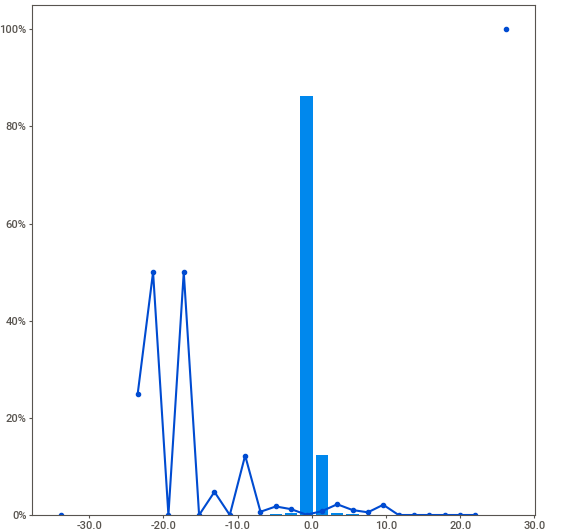
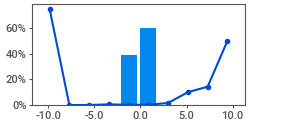
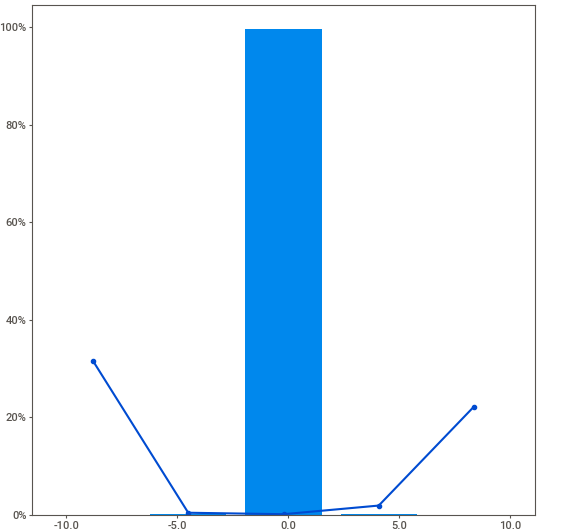
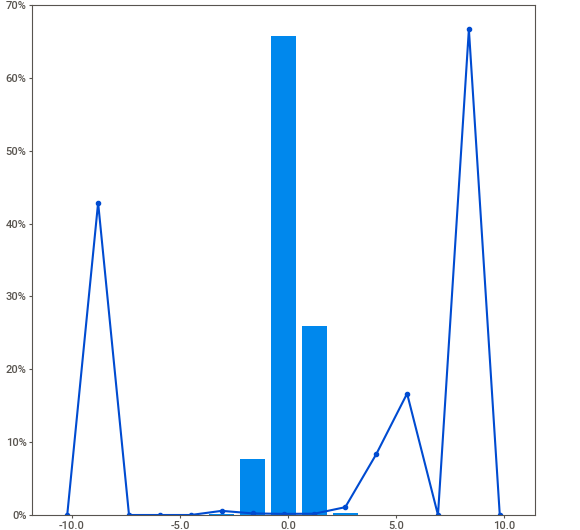
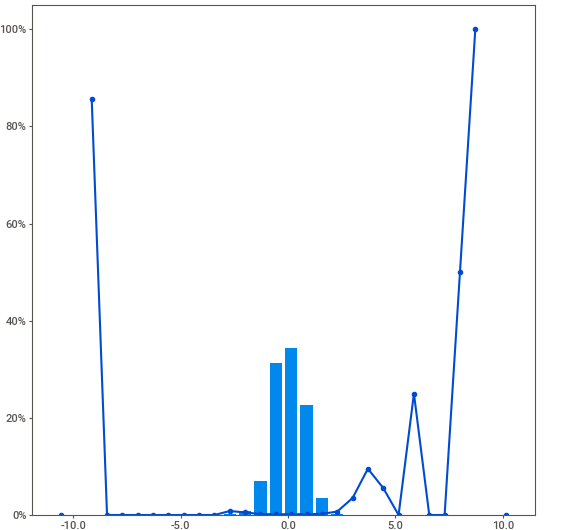
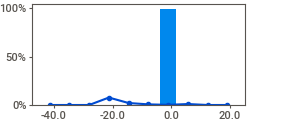
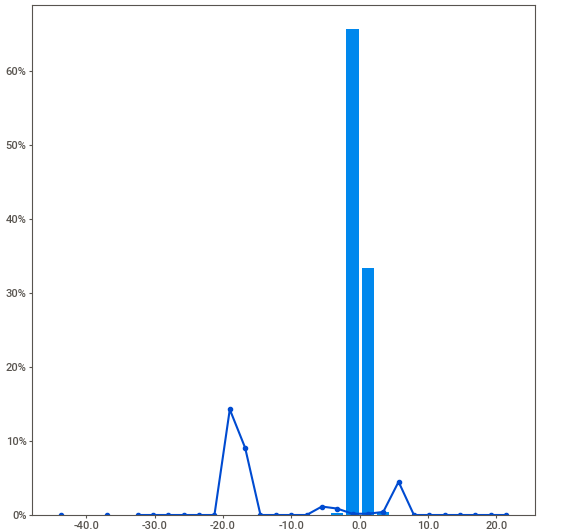
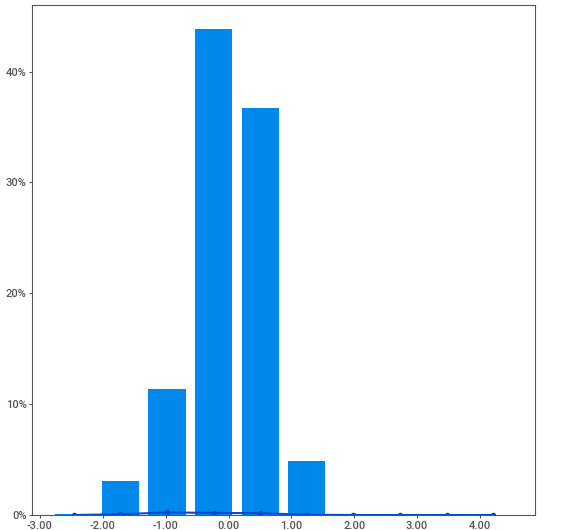
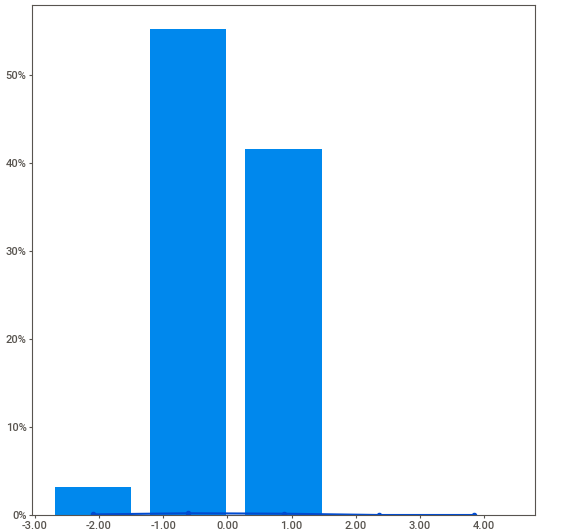
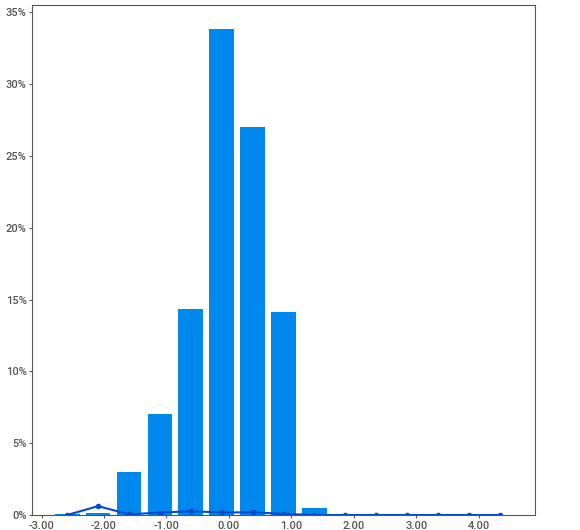
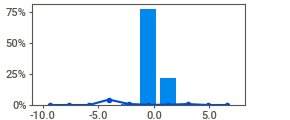
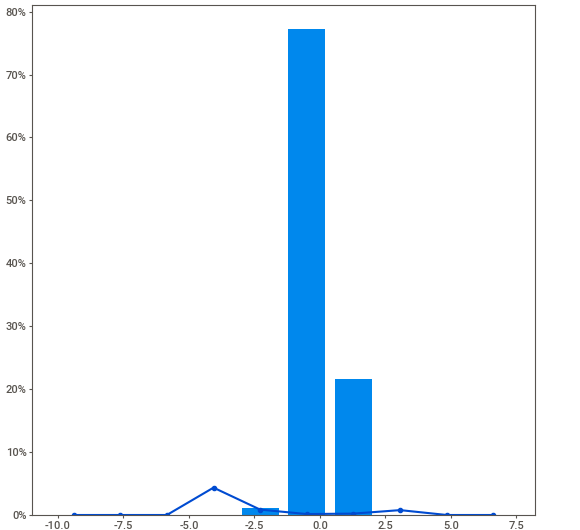
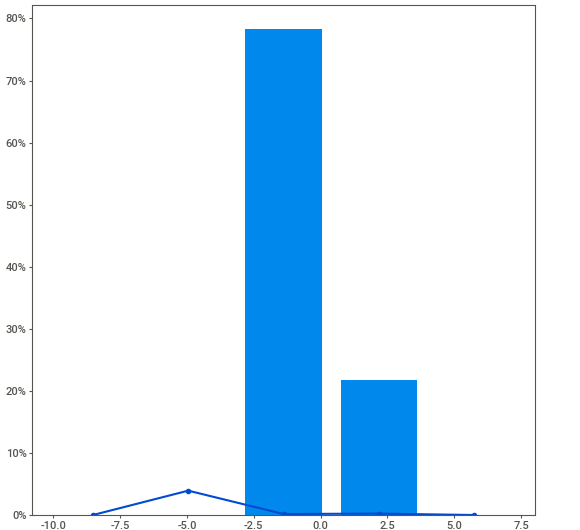
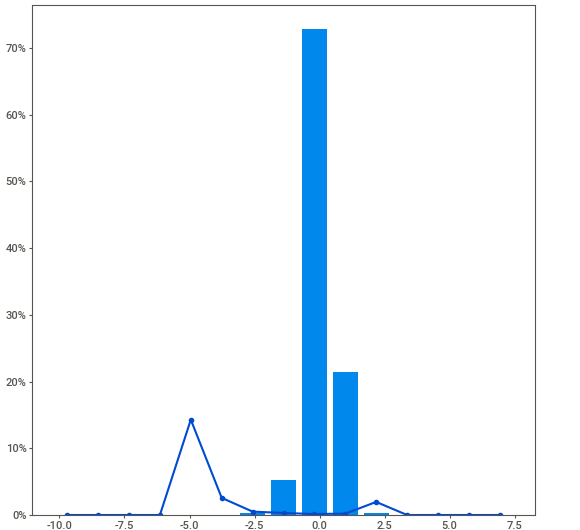
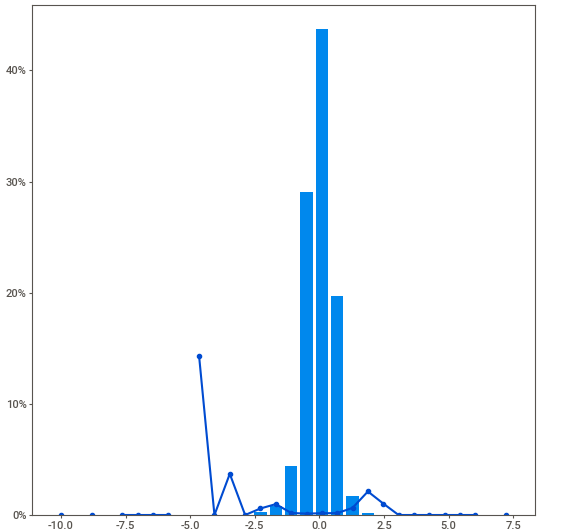
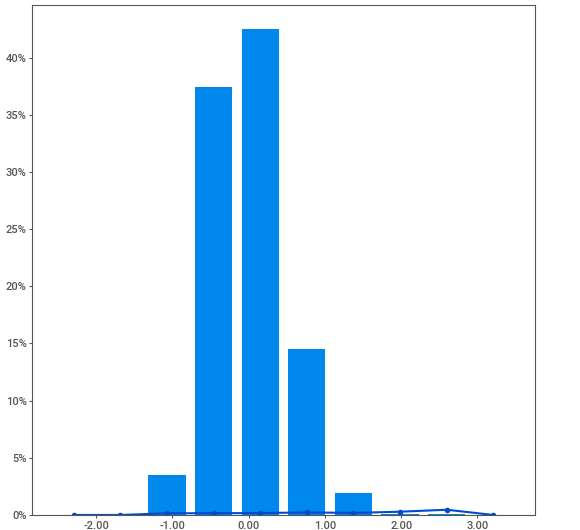
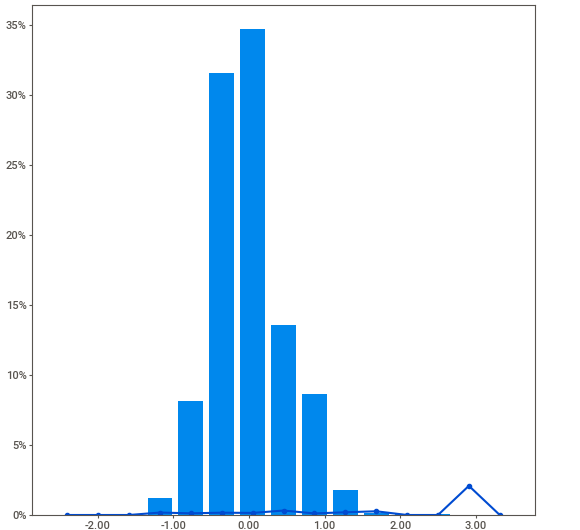
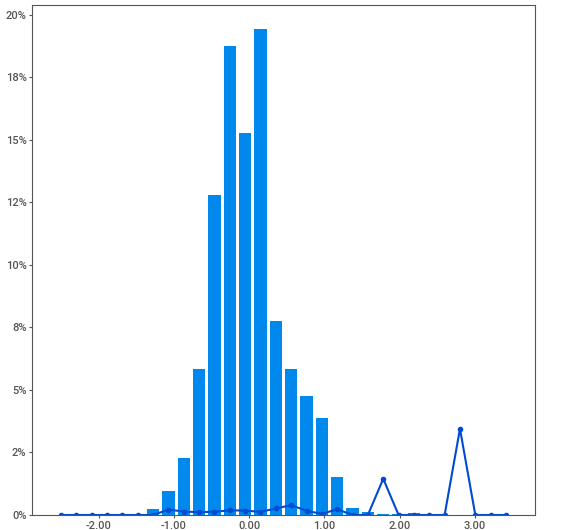
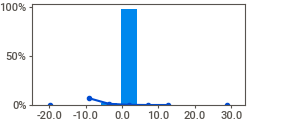
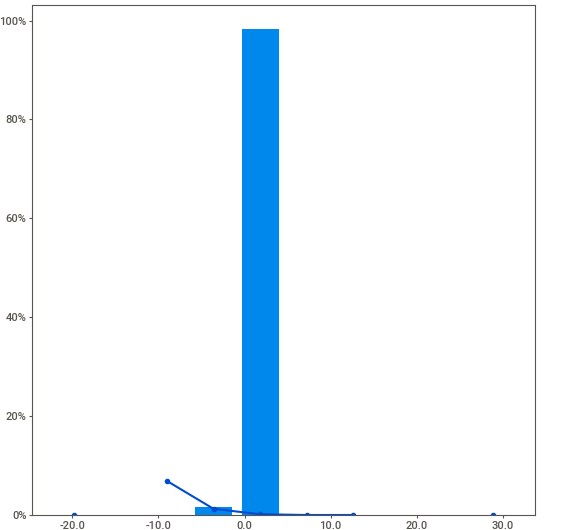
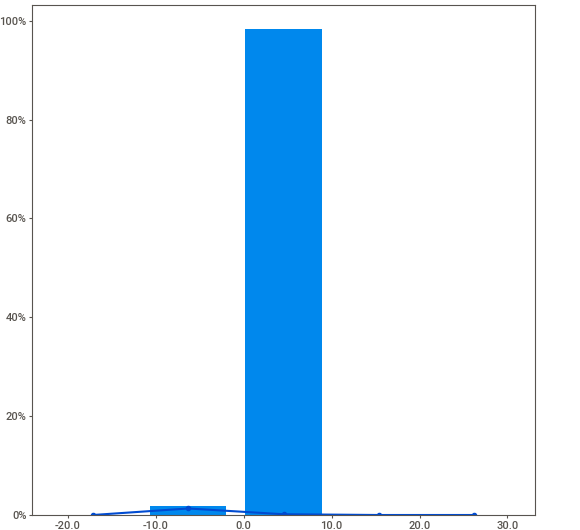
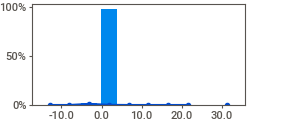
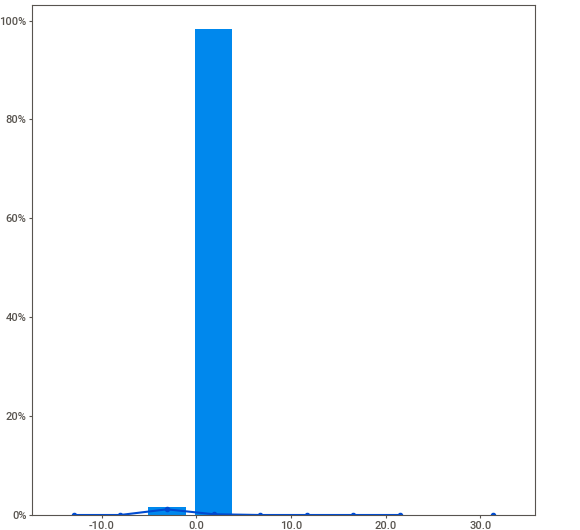
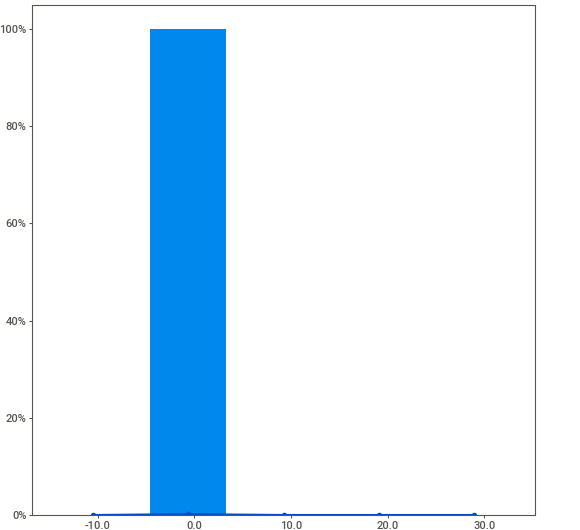
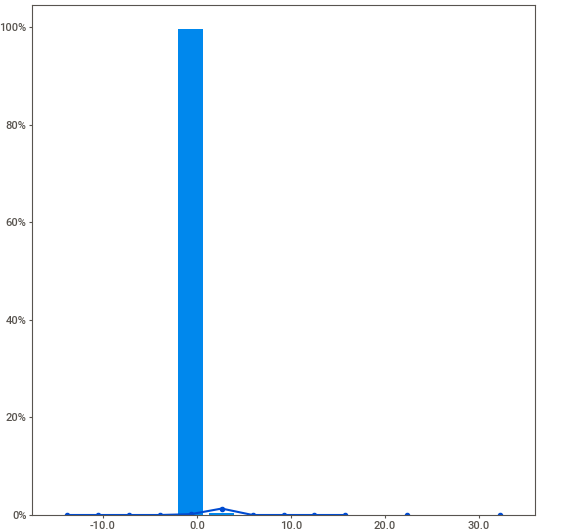
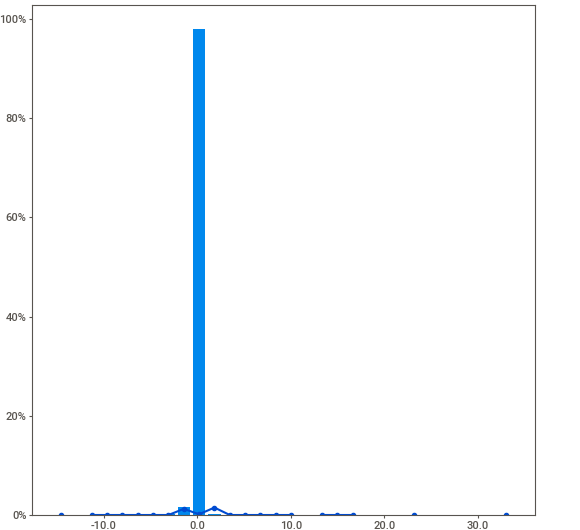
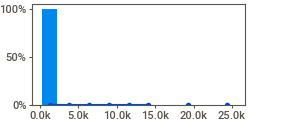
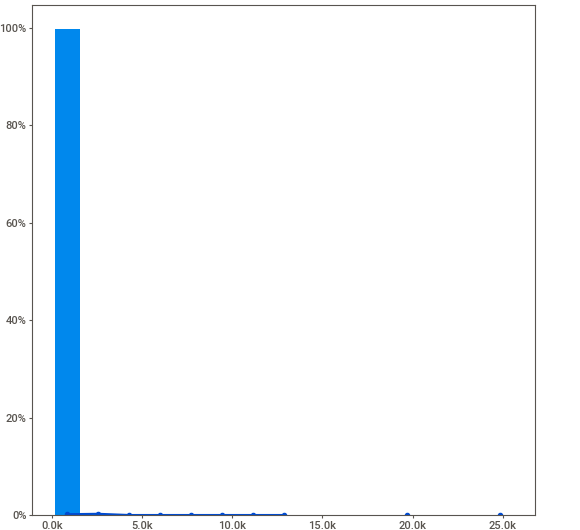
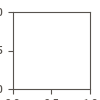

In [10]:
# Visualizing the Detailed Reports:
report.show_notebook()

In [11]:
# Understanding the DataFrame DataTypes:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [12]:
# Detailed DataFrame Information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Dataset got no missing value as all feature possess 284807 (maximum)

In [13]:
# printing unique values for each column
for i in df.columns:
    print(i,df[i].nunique())

Time 124592
V1 275653
V2 275655
V3 275657
V4 275654
V5 275657
V6 275652
V7 275651
V8 275643
V9 275656
V10 275646
V11 275648
V12 275654
V13 275657
V14 275653
V15 275653
V16 275645
V17 275646
V18 275655
V19 275645
V20 275632
V21 275617
V22 275644
V23 275611
V24 275645
V25 275640
V26 275647
V27 275597
V28 275558
Amount 32767
Class 2


In [14]:
#calculalting the total duplicate values in the Created DataFrame

df.duplicated().sum()

1081

There are duplicates in the dataset, which is okay to retain because several transactions may be executed by one creditcard at same amount and time. Hence, is safe to retain duplicates to avoid removing important features.

In [15]:
# Understanding the Features Nature:

df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ... -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [16]:
# Finding rows where all columns have values greater than 1 for future scaling (One-Hot Encoding)

# Iterate through columns and print values greater than 1
for column in df.columns:
    values_greater_than_1 = df[column] > 1
    result = df.loc[values_greater_than_1, column]
    print(f"Column {column}:")
    print(result)

Column Time:
4              2.0
5              2.0
6              4.0
7              7.0
8              7.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284803, dtype: float64
Column V1:
1         1.191857
6         1.229658
10        1.449044
12        1.249999
13        1.069374
            ...   
284788    2.007418
284793    1.971002
284796    1.884849
284800    2.039560
284804    1.919565
Name: V1, Length: 116643, dtype: float64
Column V2:
7          1.417964
9          1.119593
37         1.765124
41         2.198527
42         1.031345
            ...    
284786     2.142238
284789     1.302212
284792     1.485216
284795    10.187818
284802    10.071785
Name: V2, Length: 52919, dtype: float64
Column V3:
0         2.536347
2         1.773209
3         1.792993
4         1.548718
5         1.141109
            ...   
284767    1.844301
284780    2.219561
284781    1.894478
284799    1.189786
28

In [17]:
# Converting the 'Time' Column to the proper datatype:

import pandas as pd

# Converting the 'Time' column from float to datetime
df['Time'] = pd.to_datetime(df['Time'], unit='s')

In [18]:
# Visualizing the New dates in the 'Time' Column

df['Time'].sample(15)

177315   1970-01-02 10:12:05
182777   1970-01-02 10:52:24
234092   1970-01-02 17:03:44
128125   1970-01-01 21:50:08
247794   1970-01-02 18:41:34
15083    1970-01-01 07:20:31
229642   1970-01-02 16:33:21
31659    1970-01-01 10:07:37
30670    1970-01-01 10:00:30
64920    1970-01-01 14:15:59
40459    1970-01-01 11:10:52
238911   1970-01-02 17:37:56
1826     1970-01-01 00:23:39
139271   1970-01-01 23:04:44
266674   1970-01-02 21:07:24
Name: Time, dtype: datetime64[ns]

In [19]:
# Decribing the Average Amount Transacted At Specified Time:
print(df[['Time', 'Amount']].describe())

                                Time         Amount
count                         284807  284807.000000
mean   1970-01-02 02:20:13.859575080      88.349619
min              1970-01-01 00:00:00       0.000000
25%       1970-01-01 15:03:21.500000       5.600000
50%              1970-01-01 23:31:32      22.000000
75%       1970-01-02 14:42:00.500000      77.165000
max              1970-01-02 23:59:52   25691.160000
std                              NaN     250.120109


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


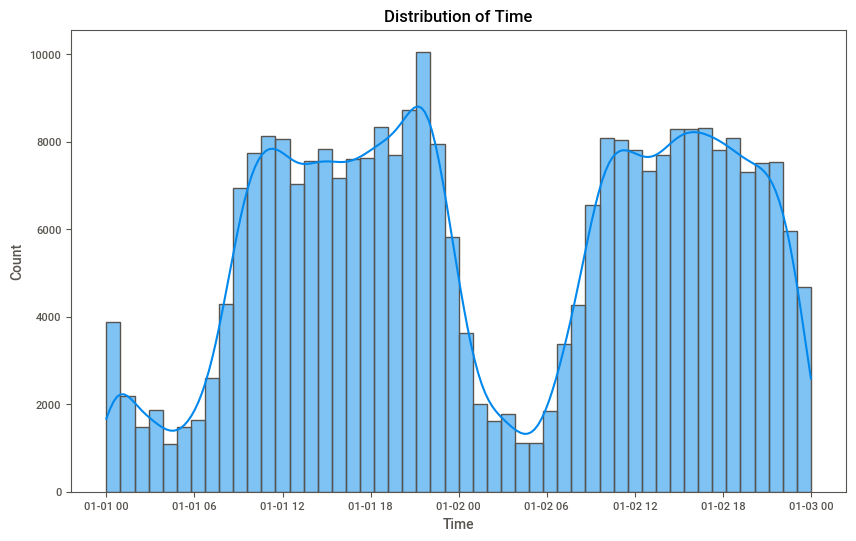

In [20]:
# Plotting a histogram of the 'Time' column to understand the distribution Peak Time:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

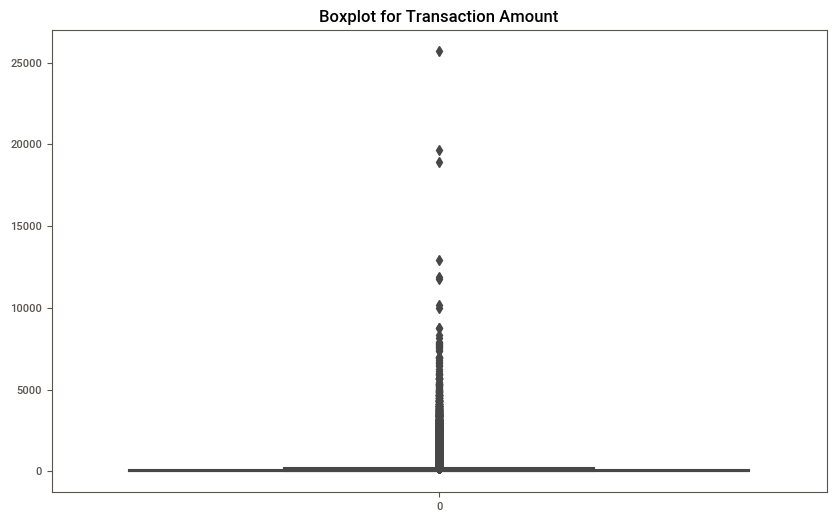

In [21]:
# Exploring the Relationship between Time and Transaction:

# Outliers: Visualization on the Boxplot

plt.figure(figsize = (10,6))
plt.title('Boxplot for Transaction Amount')
sns.boxplot(df['Amount'])
plt.show()

For Computation Efficiency, Reducing the Dataset from 248000 to about 8000 will be an effective approach building, hyperparameter tuning, training, and evaluating the Model:

In [22]:
import pandas as pd
import numpy as np

# Setting the number of samples (flexible depending on convenience)
n_samples = 8000

# Randomly sample 8,000 rows from the original DataFrame
df2 = df.sample(n=n_samples, random_state=42)

# Reset the index of the new DataFrame
df2 = df2.reset_index(drop=True)

In [23]:
# Printing the Sample Data Shape:

df2.shape

(8000, 31)

In [24]:
df2.sample(12)

Time        V1        V2        V3        V4        V5  \
7648 1970-01-01 11:55:16  1.176710 -0.818614  0.078354 -0.384405  0.249984   
3931 1970-01-01 13:28:52 -0.710394  1.096324  1.548096 -0.141573 -0.220377   
1727 1970-01-01 20:58:46  0.364647 -1.868803  0.195291  0.395567 -1.140283   
385  1970-01-02 11:49:11  1.796010 -1.134936 -0.583273  0.438838 -0.787583   
4900 1970-01-02 13:58:14 -0.436776 -0.488839  1.710610 -2.140191 -0.364386   
4115 1970-01-02 09:58:12  0.085955  0.291334  0.611489  3.110745 -0.888215   
3753 1970-01-01 09:34:43 -2.562886  2.136600 -1.017492 -2.839085  1.663922   
2955 1970-01-01 23:56:10  1.202464  0.308831  0.465247  1.125200 -0.370416   
4255 1970-01-01 17:09:27  0.708680 -0.276392  0.804571  2.621541 -0.545565   
2265 1970-01-02 23:23:01  1.747207 -1.250499 -0.479504  0.592577 -1.096511   
3582 1970-01-02 19:55:29  0.143024  1.262657  1.094969  4.496222  0.678012   
1539 1970-01-02 07:46:08  2.026439 -1.670202  0.358329 -0.557784 -1.533084   

            V6        V7        V8        V9  ...       V21       V22  \
7648  2.485755 -1.046769  0.727207 -0.573449  ... -0.376498 -0.272390   
3931 -0.733927  0.535173  0.122424 -0.354691  ... -0.204609 -0.533407   
1727  0.370634 -0.015770 -0.027628  1.157162  ... -0.007493 -0.815611   
385   0.437311 -0.875074  0.213206 -0.324663  ... -0.387887 -0.987911   
4900  0.616644 -0.688912  0.453226 -0.532100  ...  0.298643  0.658791   
4115 -0.114363  1.159178 -0.242826 -1.475982  ...  0.370580  0.960365   
3753  3.031766 -0.353426  1.451776  1.141970  ... -0.357340 -0.617524   
2955 -0.887773  0.151647 -0.210421  0.006598  ... -0.040712 -0.109998   
4255  0.182676  0.004025  0.118901 -0.435608  ... -0.011600 -0.583731   
2265  0.108780 -0.883817  0.135717 -0.233012  ... -0.022523  0.137025   
3582  0.472297  1.145804 -0.252546 -1.856637  ... -0.151272 -0.268093   
1539  1.233563 -2.021581  0.385146  1.533761  ...  0.270747  1.189343   

           V23       V24       V25       V26       V27       V28  Amount  \
7648 -0.017316 -2.179178  0.240143  0.596892  0.075871 -0.019624   11.50   
3931  0.005349  0.491491 -0.228472  0.048762  0.368635  0.168157    5.25   
1727 -0.467571 -0.500501  0.109927  0.952522 -0.122180  0.087820  483.69   
385   0.314646  0.210890 -0.546650 -0.964175  0.041222 -0.003983  142.00   
4900 -0.136134  0.172686 -0.264423 -0.263543  0.124959  0.135538   28.00   
4115  0.749778  1.005657 -1.816431  2.518153  0.087279  0.280761  227.10   
3753  0.006690  1.005186  0.169909  0.713591  0.414319  0.017862    0.77   
2955 -0.037366  0.376012  0.546303 -0.441169  0.021534  0.028981   19.99   
4255 -0.014640  0.025394  0.011417 -0.204391 -0.017764  0.066523  216.59   
2265  0.053799 -0.477433 -0.294334 -0.566418  0.045989 -0.015066  158.00   
3582  0.184233 -0.141140 -1.003230  0.034866  0.049509  0.001672   63.71   
1539  0.016060  0.138996 -0.106462  0.024369  0.086997 -0.023790   54.00   

      Class  
7648      0  
3931      0  
1727      0  
385       0  
4900      0  
4115      0  
3753      0  
2955      0  
4255      0  
2265      0  
3582      0  
1539      0  

[12 rows x 31 columns]

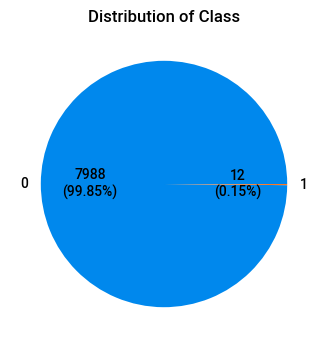

In [25]:
# Checking for imbalanced Dataset after Sampling:
# Visualizing the Class (Fraud and Safe Transaction)
def f1(x):
  total = sum(df2['Class'].value_counts().values)
  val = (x*total)/100
  return '{:.0f}\n({:.2f}%)'.format(val, x)

plt.figure(figsize = (4,4))
# df_without_dup['Cell Phone Access'].value_counts().plot(kind = 'pie', autopct = f1, 
# colormap = 'Wistia')
data = df2['Class'].value_counts()

plt.pie(data, labels = data.index, autopct = f1, textprops= {'fontsize':10})
plt.title('Distribution of Class')
plt.show()

Only 12 Fraudulent Transactions in sampled 8000 Transactions

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


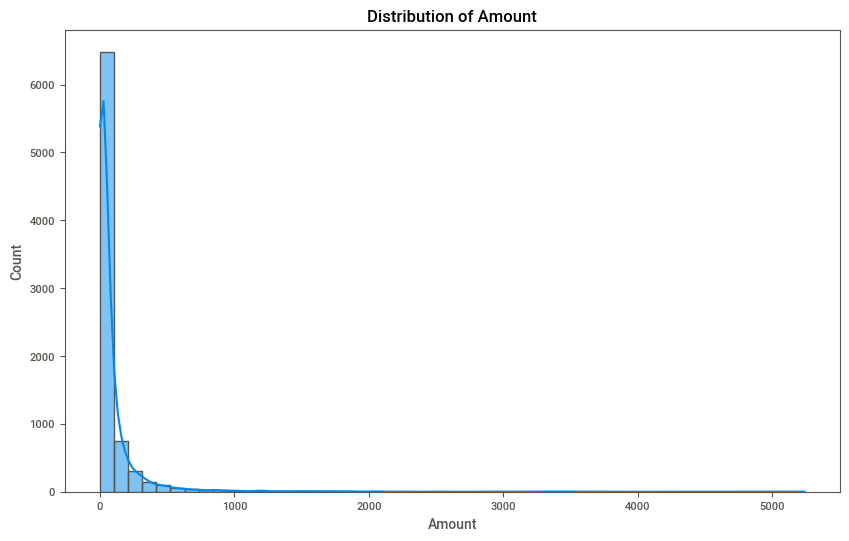

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


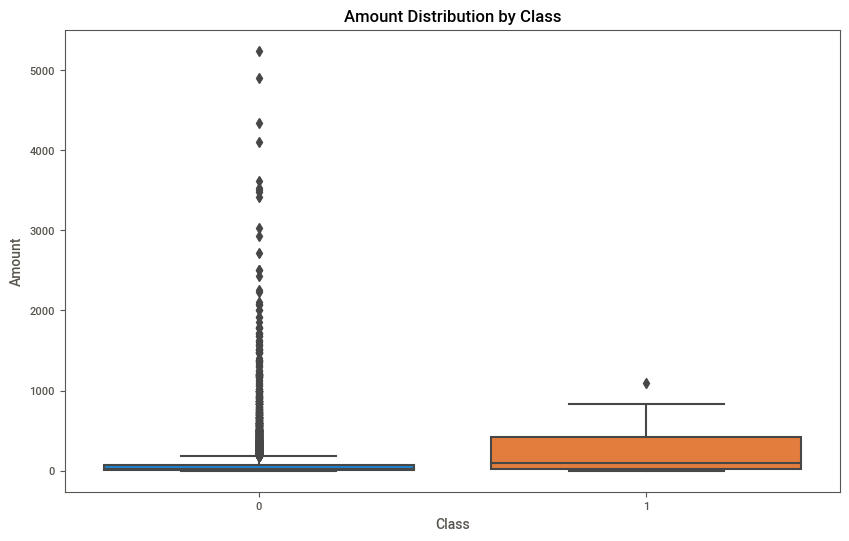

In [26]:
# Relationship between Time and Class (Fraudulent Transactions)
plt.figure(figsize=(10, 6))
sns.histplot(df2['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df2)
plt.title('Amount Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

One case of fraudulent transaction lies far from the quartile range (hence outlier)

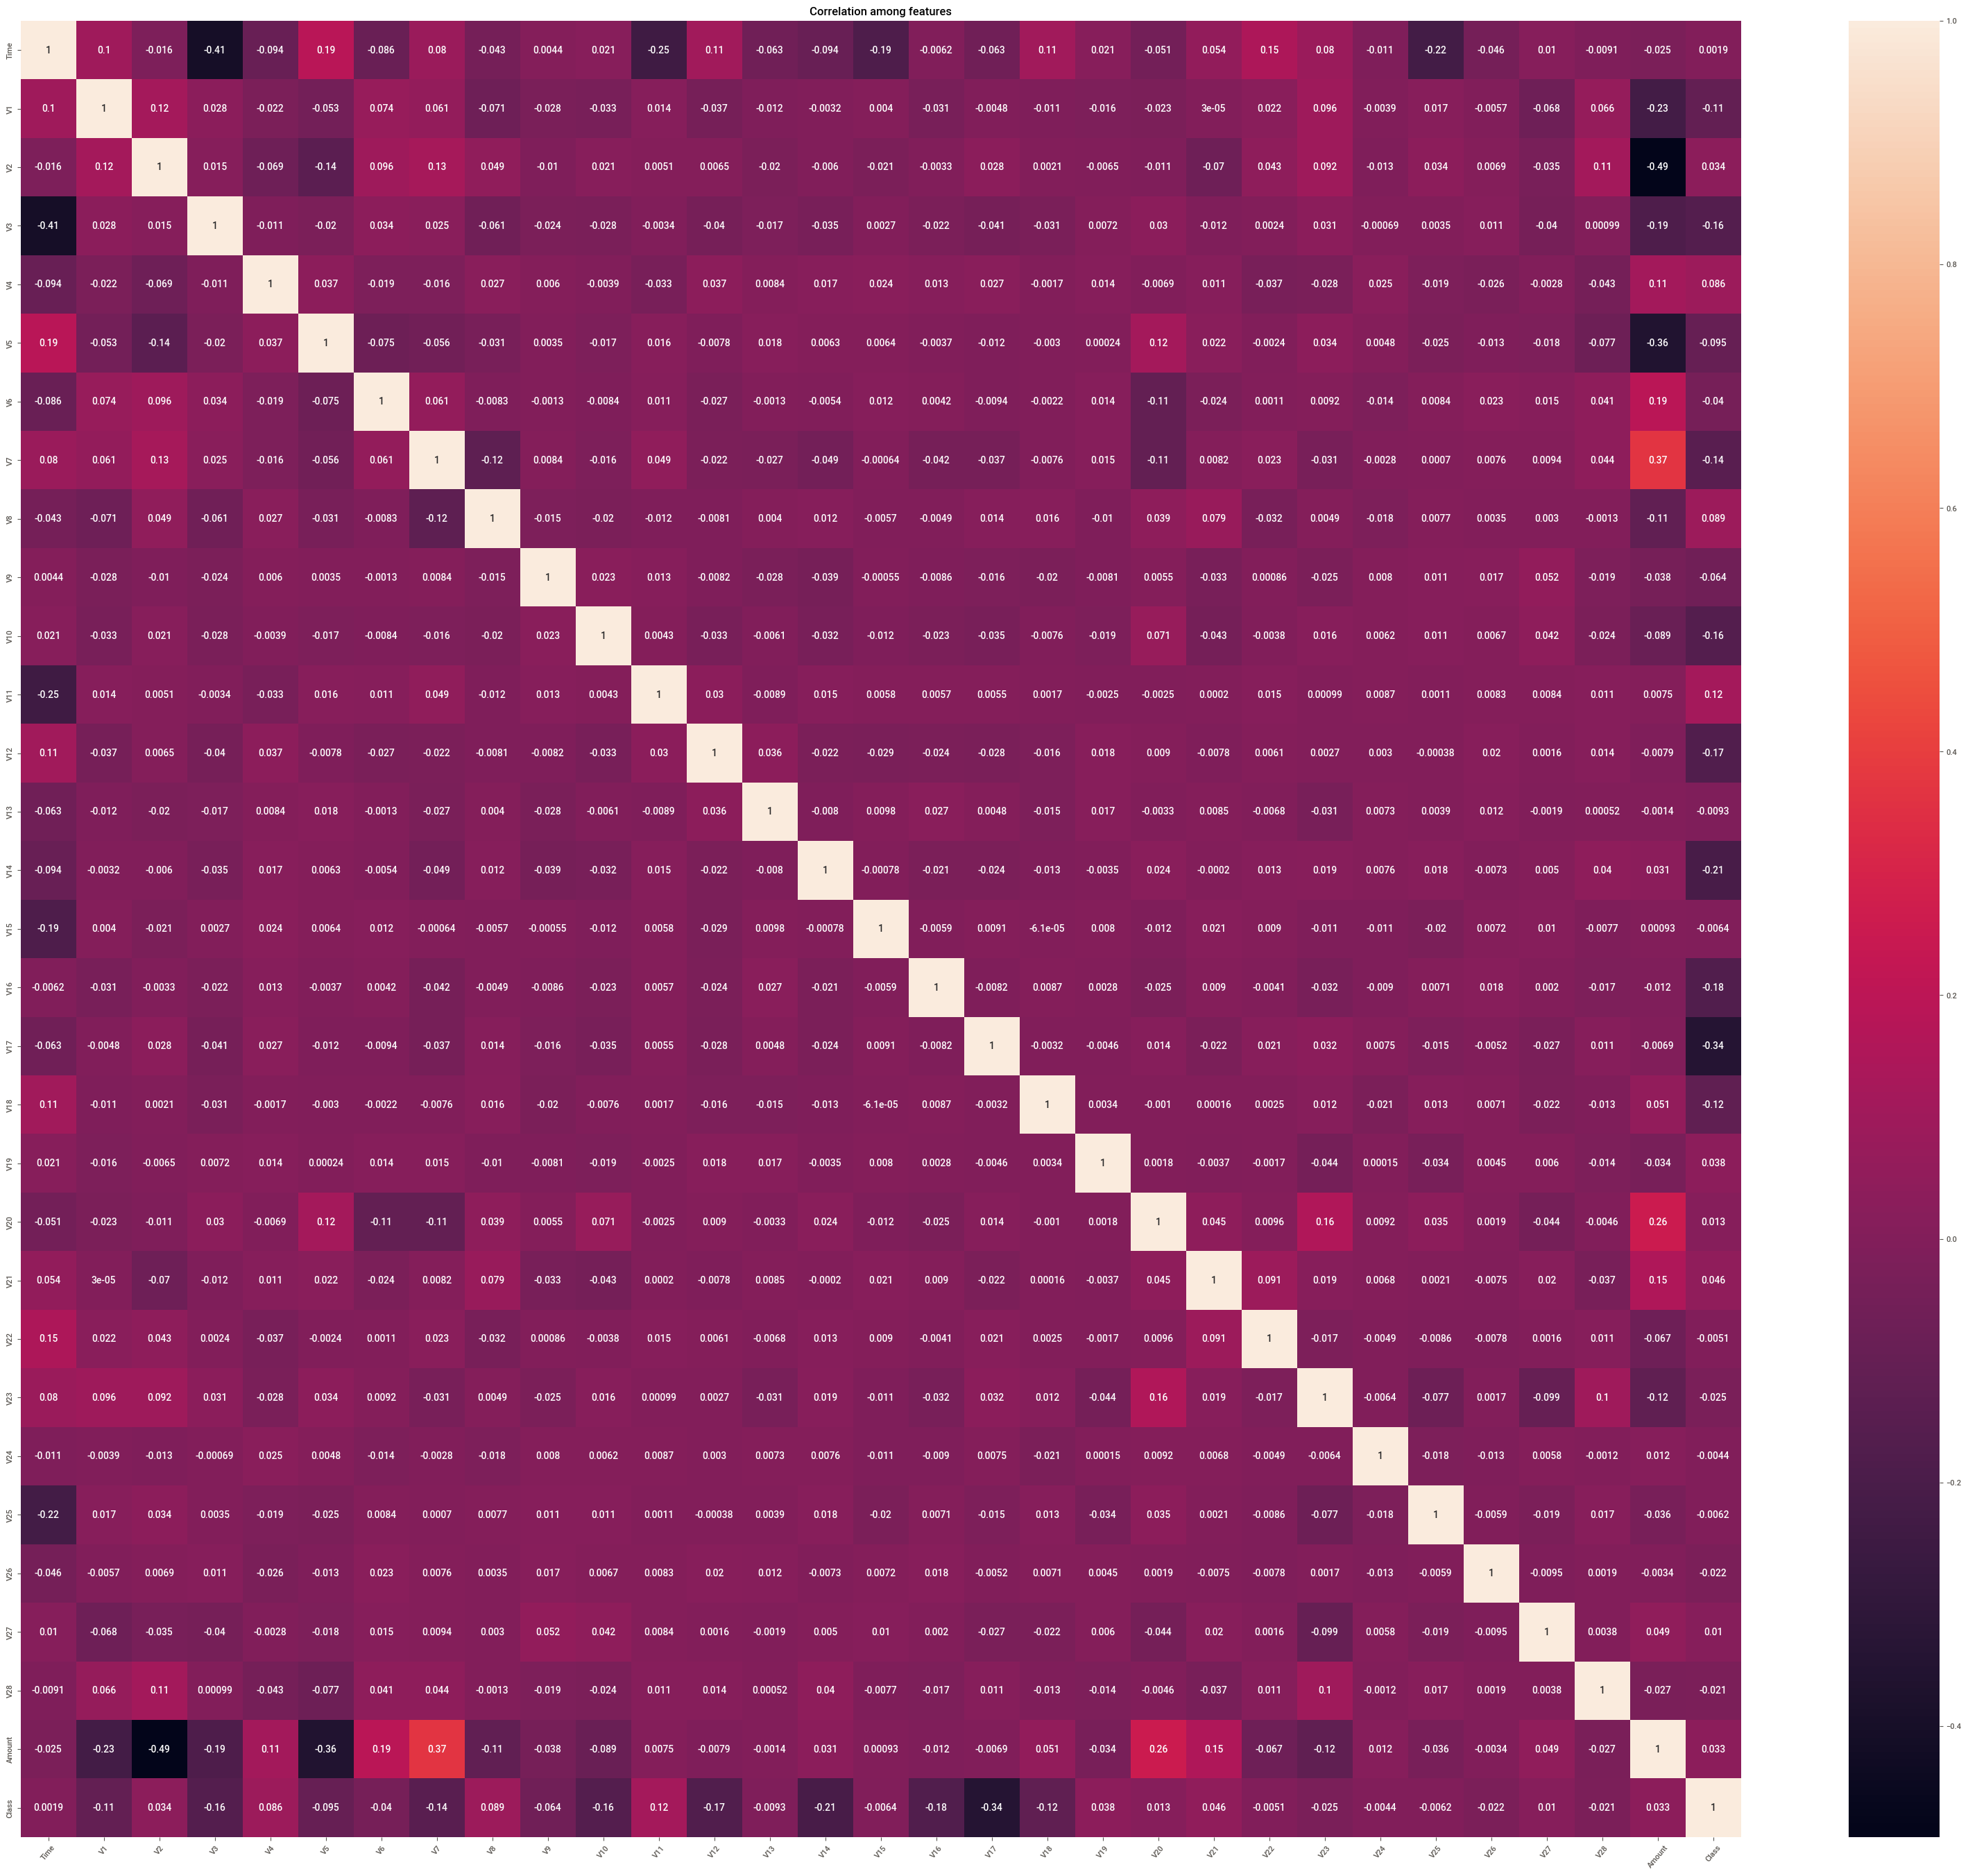

In [27]:
#  Plotting to Visualization to find Pair Correlation Values across features
import seaborn as sns

plt.figure(figsize = (40,34))
corr = df2.corr()
sns.heatmap(corr, annot = True)
plt.title('Correlation among features')
plt.xticks(rotation = 50)
plt.show()

# Features Transformation: Encoding and Scaling

In [28]:
# Converting the Time across the two Days into Binary (Day = 1 and Night = 0)
# Time column is in seconds, if not, convert it to seconds
df2['Time'] = (df2['Time'] - df2['Time'].min()).dt.total_seconds()

# Converting the 'Time' to hours
df2['Time_in_hours'] = df2['Time'] / 3600

# Defining the threshold to separate Day (1) and Night (0)
threshold = 18  # 6:00 PM in 24-hour format

# Creating the 'Time_of_day' column based on the threshold
df2['Time_of_day'] = df2['Time_in_hours'].apply(lambda x: 1 if x < threshold else 0)

# Dropping the original 'Time' and 'Time_in_hours' columns
df2 = df2.drop(columns=['Time', 'Time_in_hours'])

In [29]:
df2.head()

V1        V2         V3        V4         V5        V6         V7  \
0 -16.526507  8.584972 -18.649853  9.505594 -13.793819 -2.832404 -16.701694   
1   0.339812 -2.743745  -0.134070 -1.385729  -1.451413  1.015887  -0.524379   
2   1.399590 -0.590701   0.168619 -1.029950  -0.539806  0.040444  -0.712567   
3  -0.432071  1.647895  -1.669361 -0.349504   0.785785 -0.630647   0.276990   
4   2.014160 -0.137394  -1.015839  0.327269  -0.182179 -0.956571   0.043241   

         V8        V9        V10  ...       V22       V23       V24       V25  \
0  7.517344 -8.507059 -14.110184  ... -1.127670 -2.358579  0.673461 -1.413700   
1  0.224060  0.899746  -0.565012  ... -0.942525 -0.526819 -1.156992  0.311211   
2  0.002299 -0.971747   0.756801  ...  0.168269 -0.166639 -0.810250  0.505083   
3  0.586025 -0.484715  -1.376648  ...  0.873663 -0.178642 -0.017171 -0.207392   
4 -0.160746  0.363241   0.259452  ... -0.616400  0.347045  0.061561 -0.360196   

        V26       V27       V28  Amount  Class  Time_of_day  
0 -0.462762 -2.018575 -1.042804  364.19      1            1  
1 -0.746647  0.040996  0.102038  520.12      0            1  
2 -0.232340  0.011409  0.004634   31.00      0            1  
3 -0.157756 -0.237386  0.001934    1.50      0            0  
4  0.174730 -0.078043 -0.070571    0.89      0            0  

[5 rows x 31 columns]

Encoding and scaling converts feature values into numeric and in a range of 0 and 1 respectively allowing the machine learning more efficient as cannot do so on objects and unscaled values.

Preparing columns for Econding and scaling

In [30]:
# It's observed that all column values are already in int/float datype, hence Scaling to a range of 0 and 1) is the requirement:
cols_to_scale = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [31]:
# Importing the important Library:

from sklearn.preprocessing import MinMaxScaler

# Creating a scaler variable using the Minimum  Maximum Scaler method:
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
df2.sample(14)

V1        V2        V3        V4        V5        V6        V7  \
690   0.924885  0.764451  0.969050  0.294418  0.423784  0.570196  0.457531   
6961  0.690018  0.843880  0.682079  0.396922  0.357684  0.555970  0.349794   
7421  0.969868  0.761734  0.893128  0.255476  0.444047  0.572125  0.443237   
4831  0.907138  0.770638  0.930708  0.199531  0.461512  0.536042  0.494553   
213   0.989428  0.766493  0.822834  0.321494  0.452447  0.538087  0.460367   
3227  0.921768  0.781090  0.917611  0.283419  0.458646  0.568466  0.474156   
701   0.910374  0.774955  0.959789  0.283561  0.449011  0.571675  0.464409   
789   0.896325  0.800354  0.814340  0.287233  0.444924  0.537555  0.464618   
3297  0.967308  0.724560  0.874715  0.277650  0.407247  0.560515  0.436099   
6682  0.919909  0.749153  0.857291  0.060762  0.454346  0.525598  0.503741   
2705  0.968179  0.767181  0.907284  0.321986  0.433332  0.535272  0.452736   
5494  0.988446  0.764837  0.848638  0.376310  0.456030  0.575631  0.457209   
5192  0.864862  0.772212  0.906609  0.340973  0.447223  0.570371  0.521466   
3809  0.889108  0.799287  0.843276  0.259268  0.446126  0.543359  0.459873   

            V8        V9       V10  ...       V22       V23       V24  \
690   0.592079  0.391466  0.539027  ...  0.536780  0.658465  0.536666   
6961  0.708691  0.466294  0.521776  ...  0.357469  0.690387  0.558555   
7421  0.596241  0.616909  0.466105  ...  0.375307  0.657477  0.237060   
4831  0.583922  0.537163  0.485820  ...  0.257224  0.654284  0.438997   
213   0.592995  0.499325  0.495754  ...  0.336538  0.667170  0.367019   
3227  0.601072  0.421776  0.515288  ...  0.326963  0.660154  0.320102   
701   0.601911  0.463221  0.482855  ...  0.386277  0.654462  0.391737   
789   0.616317  0.418707  0.487254  ...  0.495655  0.659895  0.368156   
3297  0.594029  0.472002  0.538410  ...  0.384448  0.663828  0.644501   
6682  0.581216  0.450538  0.477667  ...  0.422672  0.672887  0.570630   
2705  0.589287  0.539754  0.501775  ...  0.303479  0.667206  0.514621   
5494  0.597647  0.493173  0.526988  ...  0.328930  0.668852  0.487572   
5192  0.557099  0.494103  0.609880  ...  0.443348  0.655630  0.469823   
3809  0.624380  0.419978  0.508484  ...  0.366110  0.669918  0.582027   

           V25       V26       V27       V28    Amount  Class  Time_of_day  
690   0.619484  0.381394  0.471385  0.282581  0.016986      0            1  
6961  0.437233  0.201428  0.149633  0.253099  0.007621      0            0  
7421  0.704928  0.195346  0.477783  0.288984  0.002262      0            1  
4831  0.655584  0.514421  0.435512  0.269324  0.008589      0            0  
213   0.589158  0.315374  0.472402  0.286800  0.001947      0            0  
3227  0.572263  0.364040  0.488694  0.292836  0.001523      0            1  
701   0.649039  0.401724  0.475849  0.291193  0.002195      0            0  
789   0.566397  0.294102  0.445695  0.286005  0.010545      0            0  
3297  0.439341  0.591489  0.467390  0.290714  0.088810      0            0  
6682  0.581002  0.080165  0.471201  0.288403  0.041685      0            0  
2705  0.601089  0.502190  0.467713  0.288894  0.005069      0            1  
5494  0.623684  0.143505  0.475203  0.286010  0.000571      0            0  
5192  0.549607  0.198126  0.401375  0.285791  0.049404      0            1  
3809  0.497478  0.358570  0.486172  0.297394  0.000662      0            0  

[14 rows x 31 columns]

In [33]:
df2['Class'].value_counts()

Class
0    7988
1      12
Name: count, dtype: int64

In [34]:
# Printing the df after Scaling Columns' values
for col in df2:
    print(f'{col}: {df2[col].unique()}')

V1: [0.47567006 0.94365178 0.97305694 ... 0.96533376 0.99113287 0.94877138]
V2: [0.90397778 0.72318938 0.75754856 ... 0.75515772 0.76581077 0.79366218]
V3: [0.28008047 0.87487689 0.88460038 ... 0.87376834 0.83010474 0.75852002]
V4: [0.82508171 0.2286126  0.24809703 ... 0.27457584 0.30086697 0.33423971]
V5: [0.18655561 0.42107731 0.43839902 ... 0.43790759 0.4549835  0.50899184]
V6: [0.48275815 0.58575593 0.55964865 ... 0.55705486 0.54005648 0.62096515]
V7: [0.04219278 0.44846102 0.44373498 ... 0.44904404 0.46752108 0.4618738 ]
V8: [0.77303719 0.59943829 0.59415979 ... 0.59593299 0.58945178 0.62141844]
V9: [0.         0.49830204 0.39916435 ... 0.40338739 0.46974951 0.41673006]
V10: [0.         0.50101757 0.54990961 ... 0.52922103 0.52357938 0.47198129]
V11: [0.72010205 0.3314968  0.37705231 ... 0.44552405 0.41046754 0.39476847]
V12: [0.18809326 0.83722709 0.78958792 ... 0.78949758 0.85218878 0.74572881]
V13: [0.71892758 0.4994987  0.63693111 ... 0.50251692 0.50208508 0.45850016]
V14: [0.

# Creating the X, y split from df2

In [35]:
# X, y Split and Setting Values to the Right Datatypes:

import numpy as np

X = df2.drop('Class',axis='columns')
y = testLabels = df2.Class.astype(np.int64)

# Converting the binary 'Time_of_day' from float to integer datatype
df2['Time_of_day'] = df2['Time_of_day'].astype(int)

In [36]:
y.value_counts()

Class
0    7988
1      12
Name: count, dtype: int64

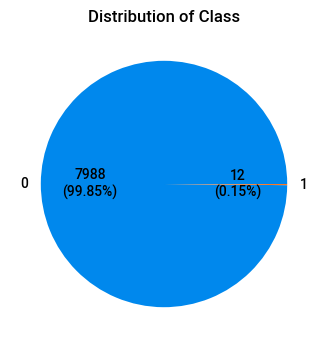

In [37]:
# Showing pie plot of the Binary Class
# Visualizing the Class (Fraud and Safe Transaction)
def f1(x):
  total = sum(y.value_counts().values)
  val = (x*total)/100
  return '{:.0f}\n({:.2f}%)'.format(val, x)

plt.figure(figsize = (4,4))
# df_without_dup['Cell Phone Access'].value_counts().plot(kind = 'pie', autopct = f1, 
# colormap = 'Wistia')
data = y.value_counts()

plt.pie(data, labels = data.index, autopct = f1, textprops= {'fontsize':10})
plt.title('Distribution of Class')
plt.show()

In [38]:
# Printing New DataTypes:

df2.dtypes

V1             float64
V2             float64
V3             float64
V4             float64
V5             float64
V6             float64
V7             float64
V8             float64
V9             float64
V10            float64
V11            float64
V12            float64
V13            float64
V14            float64
V15            float64
V16            float64
V17            float64
V18            float64
V19            float64
V20            float64
V21            float64
V22            float64
V23            float64
V24            float64
V25            float64
V26            float64
V27            float64
V28            float64
Amount         float64
Class            int64
Time_of_day      int32
dtype: object


# Creating the X_train, y_train Split:

In [39]:
# Creating train test sets split:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Building the Long-Short Term Memory Model

- Is a Sequential Model (Recurrent Neuron Newtwork - RNN) efficiently learning on Time Series events.
- Flexible to accommodate change of epochs in seeking to maximize model Performance Metrics.
- Good in handling Vanishing Gradient Problem

In [53]:
# Importing Important libraries to support the Long-Short Term Memory [LSTM] Model

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Defining a function to Create a Callable LSTM Model
def create_lstm_model(lstm_units=64, learning_rate=0.001, batch_size=32):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Defining a function to train and evaluate the LSTM model
def lstm_model(X_train, y_train, X_test, y_test, epochs=25):
    lstm_model = create_lstm_model()
    history = lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=64)
    y_preds = lstm_model.predict(X_test)
    y_preds = (y_preds > 0.5).astype(int)    

    # Calculating and visualizing the confusion matrix
    cm = confusion_matrix(y_test, y_preds)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Plotting a loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Calculating and printing the classification report
    class_report = classification_report(y_test, y_preds)
    print("Classification Report:\n", class_report)
    
    return y_preds

Epoch 1/30
200/200 [==============================] - 8s 21ms/step - loss: 0.5195 - accuracy: 0.7106
Epoch 2/30
200/200 [==============================] - 5s 23ms/step - loss: 0.2316 - accuracy: 0.9111
Epoch 3/30
200/200 [==============================] - 4s 20ms/step - loss: 0.2031 - accuracy: 0.9199
Epoch 4/30
200/200 [==============================] - 4s 20ms/step - loss: 0.2011 - accuracy: 0.9233
Epoch 5/30
200/200 [==============================] - 4s 22ms/step - loss: 0.1722 - accuracy: 0.9325
Epoch 6/30
200/200 [==============================] - 5s 23ms/step - loss: 0.1234 - accuracy: 0.9520
Epoch 7/30
200/200 [==============================] - 4s 21ms/step - loss: 0.0949 - accuracy: 0.9617
Epoch 8/30
200/200 [==============================] - 6s 30ms/step - loss: 0.0764 - accuracy: 0.9701
Epoch 9/30
200/200 [==============================] - 7s 34ms/step - loss: 0.0615 - accuracy: 0.9754
Epoch 10/30
200/200 [==============================] - 6s 29ms/step - loss: 0.0607 - accura

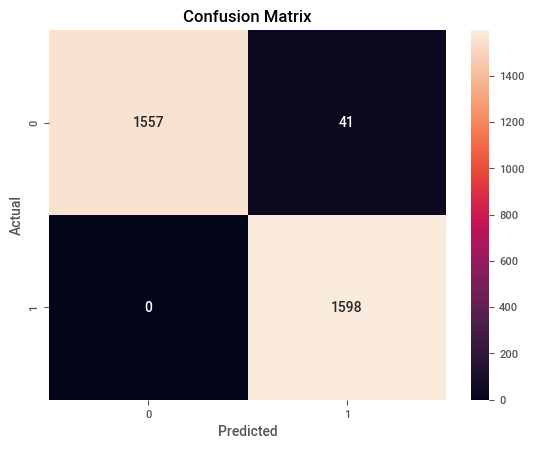

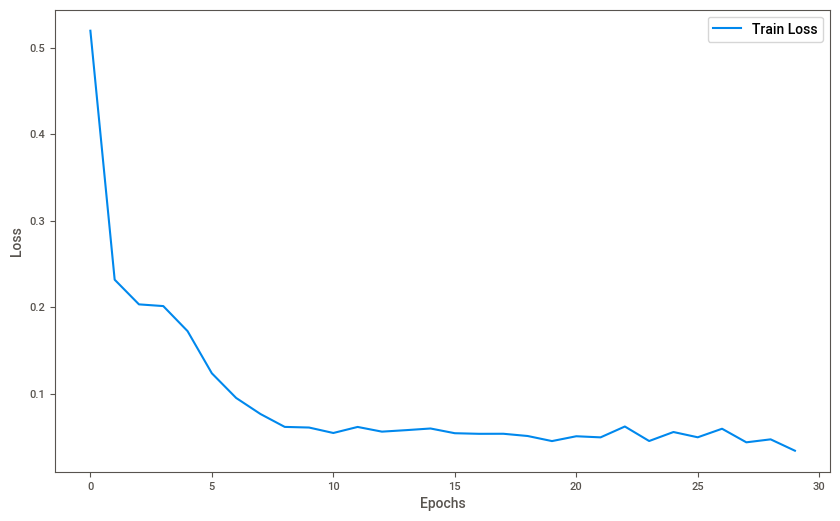

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1598
           1       0.97      1.00      0.99      1598

    accuracy                           0.99      3196
   macro avg       0.99      0.99      0.99      3196
weighted avg       0.99      0.99      0.99      3196



In [48]:
# Calling the LSTM model to Obtain Key Model Performance Metrics: confusion matrix, classification report, and loss curves
y_preds = lstm_model(X_train, y_train, X_test, y_test, epochs=30)

Precision, recall, f1-score: All reading zero (0), because low data on the fraudulent side. Hence, despite indicating 100% accuracy, the prediction power is very low as obvious errors will happen with the model.

# Applying SMOTE Method Given the Nature of Dataset: use of Under-OverSampling may Not Necessarily produce a Robust Model to Predict Fraudulent Transactions

# Notes:

SMOTE, which stands for "Synthetic Minority Over-sampling Technique," is a technique used to address class imbalance in machine learning datasets. Class imbalance occurs when one class of the target variable has significantly fewer samples compared to another class, which can lead to a biased or poorly performing model. SMOTE is a popular method for addressing this issue.

Here's how SMOTE works:

Identify the Minority Class: In a dataset with class imbalance, you typically have a majority class (the class with more samples) and a minority class (the class with fewer samples). SMOTE focuses on the minority class.

Generate Synthetic Samples: SMOTE works by generating synthetic samples for the minority class. It does this by selecting a sample from the minority class and finding its k-nearest neighbors within that class.

Interpolation: Once the nearest neighbors are identified, SMOTE creates synthetic samples by interpolating between the selected sample and its neighbors. The synthetic samples are created by selecting a fraction of the distance between the selected sample and each of its neighbors.

Balance the Classes: By generating synthetic samples for the minority class, SMOTE helps balance the class distribution. This makes the dataset more balanced and prevents the model from being biased toward the majority class.

SMOTE is particularly useful in situations where collecting additional data for the minority class is challenging or expensive. It helps improve the performance of machine learning models by reducing the bias introduced by class imbalance.

It's worth noting that while SMOTE is a valuable technique, it may not be suitable for all scenarios. You should consider the nature of your data and problem, as well as experiment with different techniques, including data augmentation and the choice of sampling strategies, to find the most effective solution for handling class imbalance in your specific machine learning project.

In [54]:
# Creating X_train y_train split using SMOTE
from imblearn.over_sampling import SMOTE

# Defining the SMOTE oversampling strategy
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Applying SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [55]:
# Checking for counts of the classes in y_resampled
y_resampled.value_counts()

Class
1    7988
0    7988
Name: count, dtype: int64

In [56]:
# Inserting the Resampled X_train, y_train
# Creating X_train, y_train split:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, 
                                                    random_state=42, stratify=y_resampled)

Epoch 1/25
200/200 [==============================] - 8s 20ms/step - loss: 0.4486 - accuracy: 0.7465
Epoch 2/25
200/200 [==============================] - 4s 22ms/step - loss: 0.1923 - accuracy: 0.9300
Epoch 3/25
200/200 [==============================] - 4s 22ms/step - loss: 0.1688 - accuracy: 0.9375
Epoch 4/25
200/200 [==============================] - 4s 21ms/step - loss: 0.1581 - accuracy: 0.9379
Epoch 5/25
200/200 [==============================] - 4s 20ms/step - loss: 0.1463 - accuracy: 0.9414
Epoch 6/25
200/200 [==============================] - 4s 22ms/step - loss: 0.1386 - accuracy: 0.9432
Epoch 7/25
200/200 [==============================] - 5s 25ms/step - loss: 0.1262 - accuracy: 0.9455
Epoch 8/25
200/200 [==============================] - 6s 29ms/step - loss: 0.1222 - accuracy: 0.9482
Epoch 9/25
200/200 [==============================] - 6s 32ms/step - loss: 0.1320 - accuracy: 0.9453
Epoch 10/25
200/200 [==============================] - 6s 29ms/step - loss: 0.1074 - accura

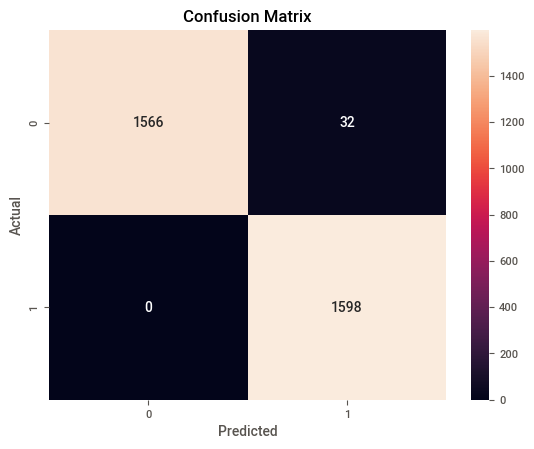

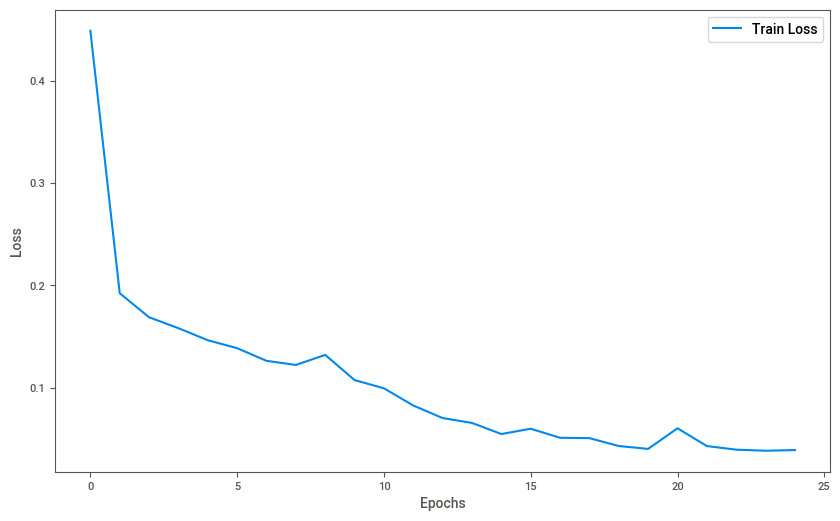

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1598
           1       0.98      1.00      0.99      1598

    accuracy                           0.99      3196
   macro avg       0.99      0.99      0.99      3196
weighted avg       0.99      0.99      0.99      3196



In [57]:
# Calling the LSTM model to Obtain Key Model Performance Metrics: confusion matrix, classification report, and loss curves
y_preds = lstm_model(X_train, y_train, X_test, y_test, epochs=25)

# Model Metric

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

# From the Classification report:
class_rep = classification_report(y_test, y_preds, output_dict=True)

# Extracting relevant metrics
precision = class_rep['1']['precision']
recall = class_rep['1']['recall']
f1_score = class_rep['1']['f1-score']
accuracy = class_rep['accuracy']

# Metrics as per the Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
print()
print('MODEL PERFORMANCE METRICS:\n')

# Creating a Function to interpret metrics
def interpret_metric(metric, threshold, metric_name):
    if metric > threshold:
        print(f"""
              {metric_name} ({metric:.2f}) is above {threshold * 100}%: making the model excellent in predicting nature of transactions!
              """
             )
    else:
        print(f"{metric_name} ({metric:.2f}) is below {threshold * 100}% - Needs improvement.")

# Defining a threshold (e.g., 0.75) for each metric
threshold = 0.75

# Interpretation of precision
interpret_metric(precision, threshold, "Precision")

# Interpretation of recall
interpret_metric(recall, threshold, "Recall")

# Interpretation of F1-score
interpret_metric(f1_score, threshold, "F1-Score")

# Interpretation of model accuracy
if accuracy > threshold:
    print(f"Model accuracy of: ({accuracy:.2f}) is above {threshold * 100}%, meaning that the Model is performing well.")
else:
    print(f"Model accuracy ({accuracy:.2f}) is below {threshold * 100}%, Model accuracy should be improved.")

# Summary statement about model performance
if tp > 0:
    print("""
          The model correctly identifies fraudulent transactions (True Positives) as demonstrated by
          high precision.
          """
         )
else:
    print("The model does not identify any fraudulent transactions (True Positives) - Further improvement is needed.")



MODEL PERFORMANCE METRICS:


              Precision (0.98) is above 75.0%: making the model excellent in predicting nature of transactions!
              

              Recall (1.00) is above 75.0%: making the model excellent in predicting nature of transactions!
              

              F1-Score (0.99) is above 75.0%: making the model excellent in predicting nature of transactions!
              
Model accuracy of: (0.99) is above 75.0%, meaning that the Model is performing well.

          The model correctly identifies fraudulent transactions (True Positives) as demonstrated by
          high precision.
          


Precision:
Precision metric assesses how correctly the model is picking positive predictions by the model as a proportion of true positive predictions out of all positive predictions made by the model. In the context of fraud detection with credit cards, high precision indicates that when the model predicts a transaction as fraudulent, it is highly likely to be correct. A high precision means fewer false alarms, which is important to prevent inconveniencing legitimate customers with false fraud alerts.

Recall:
Recall is a measure of sensitivity or true positive rate, evaluating the model's ability to identify actual positive cases. It measures the proportion of true positive predictions relative to all actual positive cases. In the context of fraud detection, high recall means the model is good at capturing most of the fraudulent transactions, minimizing the number of fraud cases that go undetected. High recall is essential to ensure that fraudulent activities are not missed.

F1-Score:
The F1-Score is a balance between precision and recall. It provides a single value that combines both metrics into a single measure of a model's overall effectiveness predicting correctly. The F1-Score is particularly useful when precision and recall have different priorities. A high F1-Score indicates that the model has both a low rate of false alarms (high precision) and captures a significant proportion of actual fraud cases (high recall). In fraud detection, a high F1-Score signifies a robust model that performs well in balancing precision and recall, making it reliable for identifying fraudulent transactions.

A high F1-Score eliminates the need to choose between emphasizing precision or recall; it indicates that the model is performing well in terms of correctly identifying fraudulent transactions without excessively generating false positives.

In summary, high figures in precision, recall, and the F1-Score are indicative of a well-performing fraud detection model.